In [1]:
# ! pip install opencv-python==4.1.2.30
! pip install opencv-contrib-python==4.4.0.46
# ! pip uninstall opencv-contrib-python --yes

     ---------------------------------------- 40.1/40.1 MB 2.4 MB/s eta 0:00:00


In [2]:
import cv2 
cv2.__version__

'4.4.0'

In [4]:
! pip install pytube
! pip install google.colab
from pytube import YouTube 
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

     ---------------------------------------- 72.9/72.9 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 64.2/64.2 kB ? eta 0:00:00
     -------------------------------------- 104.5/104.5 kB 5.9 MB/s eta 0:00:00
     -------------------------------------- 758.9/758.9 kB 8.0 MB/s eta 0:00:00
     ---------------------------------------- 8.0/8.0 MB 10.3 MB/s eta 0:00:00
     ---------------------------------------- 11.8/11.8 MB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 58.0/58.0 kB ? eta 0:00:00
     -------------------------------------- 484.2/484.2 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [843 lines of output]
  C:\Users\KHUSHI VERMA\AppData\Local\Temp\pip-install-fk3_00qc\pandas_5b0cb694d79c4d9ca92dcf1e13a72f2a\setup.py:50: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
    _CYTHON_INSTALLED = ver >= LooseVersion(min_cython_ver)
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\pandas
  copying pandas\conftest.py -> build\lib.win-amd64-cpython-39\pandas
  copying pandas\testing.py -> build\lib.win-amd64-cpython-39\pandas
  copying pandas\_version.py -> build\lib.win-amd64-cpython-39\pandas
  copying pandas\__init__.py -> build\lib.win-amd64-cpython-39\pandas
  creating build\lib.win-amd64-cpython-39\pandas\api
  copying pandas\api\__init__.py -> build\lib.win-amd64-cpython-39\pandas\api
  creating build

ModuleNotFoundError: No module named 'google.colab'

# Copilot - driving assistance
## Lane and obstacle detection for active assistance during driving.

Accompanying article https://towardsdatascience.com/copilot-driving-assistance-635e1a50f14

Imagine having a momentary loss of attention while driving down a highway, and immediately you hone letting off a auditory warning alerting you before you come too close to the vehicle infront. If you are overspeeding a message nudges you to slowdown. After you complete the drive you can see a summary of how safe or rash you have driven during this trip.


![alt text](https://github.com/visualbuffer/copilot/raw/master/images/assets/Top-View.gif)

This notebook runs through the code available at  https://github.com/visualbuffer/copilot . It uses pytube library which allows it to download and subsequently process you tube videos.

There will be three steps we will first download all the dependencies, second set up the parameters for processing and finally process a stream of video. Our objective is to get to a real time or better processing speed. 

So onto the first step downloading and instaqlling all the dependencies.

In [2]:
# ! rm -r copilot
# !rm -r images
# !rm -r utils
# !rm -r font
# !rm -r keras-yolo3-master/
# !rm -r keras-yolo3-queee/
# !rm -r model_data
# !rm -r videos
# !rm -r zoo
! git clone https://github.com/visualbuffer/copilot.git
! mv copilot/* ./
! mkdir videos
! mkdir images
! mkdir images/from_video
! mkdir images/detection
# ! wget  -P ./model_data/  https://pjreddie.com/media/files/yolov3.weights
! wget -P ./model_data/ https://s3-ap-southeast-1.amazonaws.com/deeplearning-mat/backend.h5
!pip install git+git://github.com/minwook-shin/pytube --force

Cloning into 'copilot'...
remote: Enumerating objects: 482, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 482 (delta 53), reused 116 (delta 50), pack-reused 363
Receiving objects: 100% (482/482), 15.36 MiB | 11.87 MiB/s, done.
Resolving deltas: 100% (262/262), done.
mkdir: cannot create directory ‘images’: File exists
--2023-01-20 22:32:54--  https://s3-ap-southeast-1.amazonaws.com/deeplearning-mat/backend.h5
Resolving s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)... 52.219.36.37
Connecting to s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)|52.219.36.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248671664 (237M) [application/x-www-form-urlencoded]
Saving to: ‘./model_data/backend.h5’

backend.h5          100%[===================>] 237.15M  43.8MB/s    in 5.6s    

2023-01-20 22:33:00 (42.2 MB/s) - ‘./model_data/backend.h5’ saved [248671664/24867166

## Dependencies
We will import the dependencies and set up a helper function to extract youtube videos.

In [4]:
def download_file(link, file) :
  video = "./videos/" #to_do 
  yt = YouTube(link)   
  yt.streams.filter(progressive=True, file_extension='mp4').order_by('resolution').first().download(output_path=video, filename=str(file))

  print(link, ' Downloaded to ',video+ str(file))

  return video+ str(file)+".mp4"

In [5]:
download_file("https://www.youtube.com/watch?reload=9&v=rT0TQmxxeeE","electronic_city")
download_file("https://www.youtube.com/watch?v=b8iR1rcDxi4","nice_road")
download_file("https://www.youtube.com/watch?v=-SHw5gkB9Ow&list=PLvdT8C0jlPY0uFs8Ogh8Hb1FVvRe3DLj9","nh60")

https://www.youtube.com/watch?reload=9&v=rT0TQmxxeeE  Downloaded to  ./videos/electronic_city
https://www.youtube.com/watch?v=b8iR1rcDxi4  Downloaded to  ./videos/nice_road
https://www.youtube.com/watch?v=-SHw5gkB9Ow&list=PLvdT8C0jlPY0uFs8Ogh8Hb1FVvRe3DLj9  Downloaded to  ./videos/nh60


'./videos/nh60.mp4'

## Initiate the parameters

In this step we will evaluate the parameters and check if they are optimal. Each camere as slightly different sensetivity so a universal threshold will not work. However once set for a given camera it should be good enough. Similary dash cams are mounted in different position some tweaks might be required for the same.

Check the masked images they should pick up the lanes avoid the road and foilage. If not adjust the parameters a bit. Finally check if the horizon / vanishing point is being picked correctly. Normally we would supply a frame from the video which contains a straight set of the road for determining the position.

![alt text](https://github.com/visualbuffer/copilot/raw/master/images/assets/Slide4.PNG)




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
PERSPECTIVE TRANSFORMATION MATRIX COMPUTED


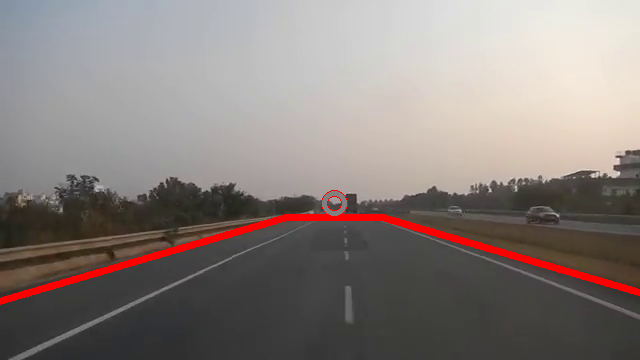

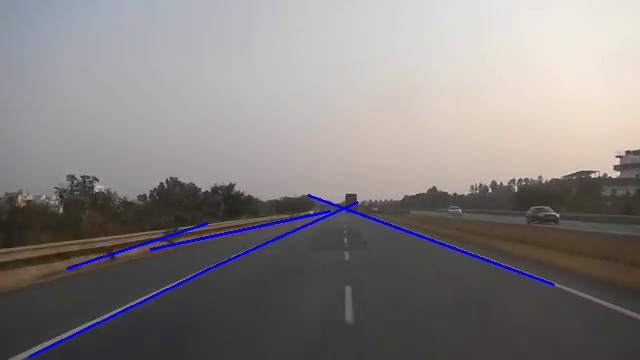

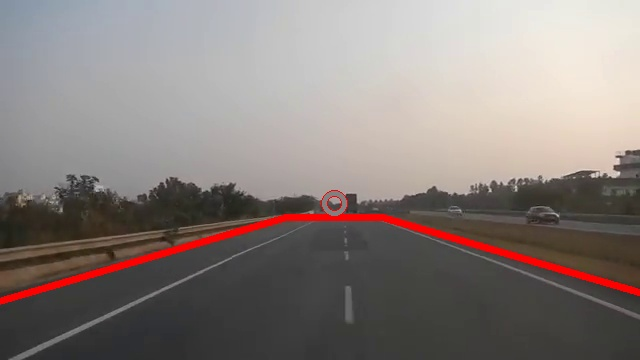

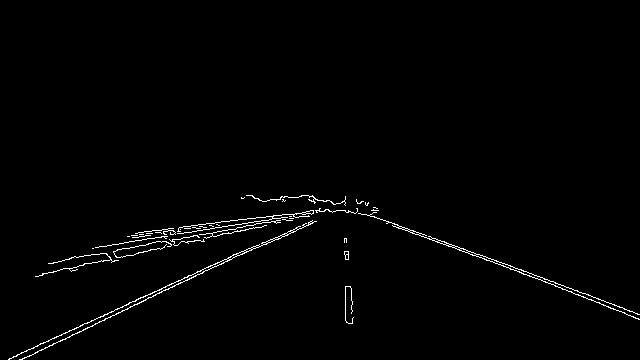

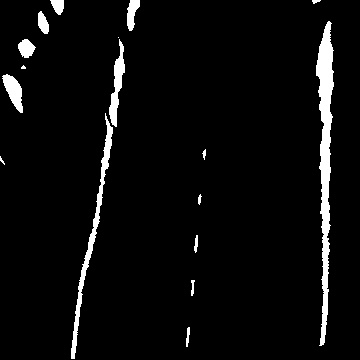

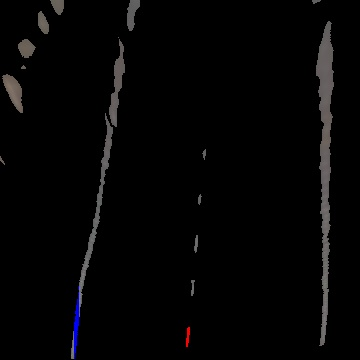

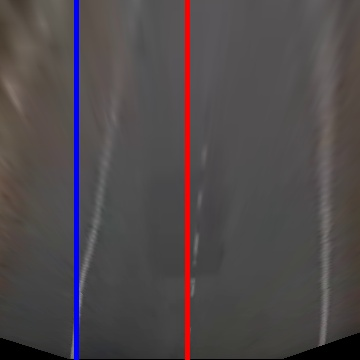

In [7]:
! pip install keras
from lane_detection import LANE_DETECTION
video_reader =  cv2.VideoCapture("./videos/nice_road") 
fps =  video_reader.get(cv2.CAP_PROP_FPS)
nb_frames = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
frame_h = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_w = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
pers_frame_time = 398# seconds
pers_frame = int(pers_frame_time *fps)
video_reader.set(1,pers_frame)
ret, image = video_reader.read()

ld = LANE_DETECTION( image,fps, 
                    yellow_lower = np.uint8([ 20, 50,   110]),
                    yellow_upper = np.uint8([35, 255, 255]),
                    white_lower = np.uint8([ 0, 140,   0]), 
                    white_upper = np.uint8([255, 255, 100]), 
                    lum_factor = 110,
                    lane_start=[0.2,0.5])
cv2_imshow(image)

cv2_imshow(cv2.imread("./images/detection/perspective_lines.jpg"))
cv2_imshow(cv2.imread("./images/detection/vanishing_point.jpg"))
cv2_imshow(cv2.imread("./images/detection/edges.jpg"))
cv2_imshow(cv2.imread("./images/detection/mask.jpg"))
cv2_imshow(cv2.imread("./images/detection/masked_regions.jpg"))
cv2_imshow(cv2.imread("./images/detection/lane_width.jpg"))




In [8]:
image.shape

(360, 640, 3)

## Processing frames

Once you are happy with the parameters we will supply them to the frame class method and have it process the video

### List of parameters

| PARAMETER  | Description |
| ------------- | ------------- |
|SELF VEHICLE OFFSET| Trim off from bottom edge video if ego vehicle covers part of the frame % of front view|
| LOWER YELLOW HLS THRESHOLD  | Lower yellow HLS threshold used to prepare the mask. Tune down if yellow lane is not detected, up if all the foilage is  |
| UPPER YELLOW HLS THRESHOLD | Upper threshold for identifying yellow lanes |
|LOWER WHITE THRESHOLD| Lower yellow HLS threshold used to prepare the mask. Tune up  saturation if  foilage lights up the entire scene  |
|UPPER WHITE THRESHOLD| |
|NORMALIZING LUM FACTOR| Factor used to normalize luminosity against, reducing increses lower Lum threshold |
|MAX GAP THRESHOLD| Max continous gap tollerated in the lane detection % of top-view height |
|YOLO PERIOD| Period [s] after which YOLO is detected, typ 2s reducing decreases processing fps increases detection|
|LANE INITIATION| intial guess for lane start % of top-view width|
|VERBOSITY|1 Show lesser,2 Show less,3 Show everything |


```python

#frame.process_video( input location , frame rate reduction factor
#        save location, perspective computed at time
#        start time , end time for processing [s])

```

This is set to about 1000 secs about 15 mins. Change t1 if you need to reduce processing duration

In [3]:
from frame import FRAME

file_path =  "./videos/nice_road"# <== Upload appropriate file          
video_out = "videos/output11.mov"
frame =  FRAME( 
    ego_vehicle_offset = .0,                       # offset for self vehicle in frame
    yellow_lower = np.uint8([ 20, 50,   110]),      # LOWER YELLOW HLS THRESHOLD
    yellow_upper = np.uint8([35, 255, 255]),        # UPER YELLOW HLS THRESHOLD
    white_lower = np.uint8([ 0, 140,   0]),         # LOWER WHITE THRESHOLD
    white_upper = np.uint8([180, 255, 100]),        # UPPER WHITE THRESHOLD
    lum_factor = 110,                               # NORMALIZING LUM FACTOR
    max_gap_th = 0.45,                              # MAX GAP THRESHOLD
    YOLO_PERIOD = 2,                              # YOLO PERIOD
    lane_start=[0.2,0.5] ,                        # LANE INITIATION
    verbose = 3)                                  # VERBOSITY
frame.process_video(file_path, 2,\
        video_out = video_out,pers_frame_time =398,\
        t0  =398 , t1 =698)#None)                  

./videos/nice_road WIDTH 640 HEIGHT 360 FPS 29.97 DUR 1686.0 s
PERSPECTIVE TRANSFORMATION MATRIX COMPUTED


  0%|          | 0/8991 [00:00<?, ?it/s]

[[[161 146 133]
  [161 146 133]
  [161 146 133]
  ...
  [223 230 231]
  [223 230 231]
  [223 230 231]]

 [[161 146 133]
  [161 146 133]
  [161 146 133]
  ...
  [223 230 231]
  [223 230 231]
  [223 230 231]]

 [[161 146 133]
  [161 146 133]
  [161 146 133]
  ...
  [223 230 231]
  [223 230 231]
  [223 230 231]]

 ...

 [[ 46  46  46]
  [ 46  46  46]
  [ 46  46  46]
  ...
  [ 48  52  54]
  [ 48  52  54]
  [ 48  52  54]]

 [[ 46  46  46]
  [ 46  46  46]
  [ 46  46  46]
  ...
  [ 48  52  54]
  [ 48  52  54]
  [ 48  52  54]]

 [[ 46  46  46]
  [ 46  46  46]
  [ 46  46  46]
  ...
  [ 48  52  54]
  [ 48  52  54]
  [ 48  52  54]]]
1/1 [==============================] - 5s 5s/step


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
  0%|          | 1/8991 [00:08<20:04:17,  8.04s/it]


LANE CHANGE TO RIGHT
[[[161 146 133]
  [161 146 133]
  [161 146 133]
  ...
  [223 230 231]
  [223 230 231]
  [223 230 231]]

 [[161 146 133]
  [161 146 133]
  [161 146 133]
  ...
  [223 230 231]
  [223 230 231]
  [223 230 231]]

 [[161 146 133]
  [161 146 133]
  [161 146 133]
  ...
  [223 230 231]
  [223 230 231]
  [223 230 231]]

 ...

 [[ 46  46  46]
  [ 46  46  46]
  [ 46  46  46]
  ...
  [ 48  52  54]
  [ 48  52  54]
  [ 48  52  54]]

 [[ 46  46  46]
  [ 46  46  46]
  [ 46  46  46]
  ...
  [ 48  52  54]
  [ 48  52  54]
  [ 48  52  54]]

 [[ 46  46  46]
  [ 46  46  46]
  [ 46  46  46]
  ...
  [ 48  52  54]
  [ 48  52  54]
  [ 48  52  54]]]
[[[161 146 133]
  [161 146 133]
  [161 146 133]
  ...
  [223 230 231]
  [223 230 231]
  [223 230 231]]

 [[161 146 133]
  [161 146 133]
  [161 146 133]
  ...
  [223 230 231]
  [223 230 231]
  [223 230 231]]

 [[161 146 133]
  [161 146 133]
  [161 146 133]
  ...
  [223 230 231]
  [223 230 231]
  [223 230 231]]

 ...

 [[ 46  46  46]
  [ 46  46  46

  1%|          | 89/8991 [00:13<18:21,  8.09it/s]  

[[[161 146 133]
  [161 146 133]
  [161 146 133]
  ...
  [223 230 231]
  [223 230 231]
  [223 230 231]]

 [[161 146 133]
  [161 146 133]
  [161 146 133]
  ...
  [223 230 231]
  [223 230 231]
  [223 230 231]]

 [[161 146 133]
  [161 146 133]
  [161 146 133]
  ...
  [223 230 231]
  [223 230 231]
  [223 230 231]]

 ...

 [[ 47  47  47]
  [ 47  47  47]
  [ 47  47  47]
  ...
  [ 48  47  49]
  [ 48  47  49]
  [ 48  47  49]]

 [[ 47  47  47]
  [ 47  47  47]
  [ 47  47  47]
  ...
  [ 48  47  49]
  [ 48  47  49]
  [ 48  47  49]]

 [[ 47  47  47]
  [ 47  47  47]
  [ 47  47  47]
  ...
  [ 48  47  49]
  [ 48  47  49]
  [ 48  47  49]]]
[[[161 146 133]
  [161 146 133]
  [161 146 133]
  ...
  [223 230 231]
  [223 230 231]
  [223 230 231]]

 [[161 146 133]
  [161 146 133]
  [161 146 133]
  ...
  [223 230 231]
  [223 230 231]
  [223 230 231]]

 [[161 146 133]
  [161 146 133]
  [161 146 133]
  ...
  [223 230 231]
  [223 230 231]
  [223 230 231]]

 ...

 [[ 47  47  47]
  [ 47  47  47]
  [ 47  47  47]
  ..

  2%|▏         | 177/8991 [00:20<14:51,  9.89it/s]

[[[166 151 138]
  [166 151 138]
  [167 152 139]
  ...
  [215 223 227]
  [213 221 225]
  [213 221 225]]

 [[166 151 138]
  [166 151 138]
  [167 152 139]
  ...
  [161 169 173]
  [161 169 173]
  [161 169 173]]

 [[166 151 138]
  [166 151 138]
  [167 152 139]
  ...
  [ 95 103 107]
  [ 95 103 107]
  [ 95 103 107]]

 ...

 [[ 43  43  43]
  [ 43  43  43]
  [ 43  43  43]
  ...
  [ 36  36  36]
  [ 36  36  36]
  [ 36  36  36]]

 [[ 43  43  43]
  [ 43  43  43]
  [ 43  43  43]
  ...
  [ 36  36  36]
  [ 36  36  36]
  [ 36  36  36]]

 [[ 43  43  43]
  [ 43  43  43]
  [ 43  43  43]
  ...
  [ 37  37  37]
  [ 37  37  37]
  [ 37  37  37]]]
[[[167 152 139]
  [167 152 139]
  [168 153 140]
  ...
  [ 45  47  54]
  [ 45  47  54]
  [ 45  47  54]]

 [[167 152 139]
  [167 152 139]
  [168 153 140]
  ...
  [ 45  47  54]
  [ 45  47  54]
  [ 45  47  54]]

 [[167 152 139]
  [167 152 139]
  [168 153 140]
  ...
  [ 45  47  54]
  [ 45  47  54]
  [ 45  47  54]]

 ...

 [[ 44  44  44]
  [ 44  44  44]
  [ 44  44  44]
  ..

  3%|▎         | 239/8991 [00:23<11:53, 12.26it/s]

[[[167 155 141]
  [167 155 141]
  [167 155 141]
  ...
  [223 230 236]
  [223 230 236]
  [223 230 236]]

 [[167 155 141]
  [167 155 141]
  [167 155 141]
  ...
  [223 230 236]
  [223 230 236]
  [223 230 236]]

 [[167 155 141]
  [167 155 141]
  [167 155 141]
  ...
  [223 230 236]
  [223 230 236]
  [223 230 236]]

 ...

 [[ 45  47  49]
  [ 45  47  49]
  [ 45  47  49]
  ...
  [ 57  60  60]
  [ 57  60  60]
  [ 57  60  60]]

 [[ 45  47  49]
  [ 45  47  49]
  [ 45  47  49]
  ...
  [ 57  60  60]
  [ 57  60  60]
  [ 57  60  60]]

 [[ 45  47  49]
  [ 45  47  49]
  [ 45  47  49]
  ...
  [ 57  60  60]
  [ 57  60  60]
  [ 57  60  60]]]
[[[167 155 141]
  [167 155 141]
  [167 155 141]
  ...
  [223 230 236]
  [223 230 236]
  [223 230 236]]

 [[167 155 141]
  [167 155 141]
  [167 155 141]
  ...
  [223 230 236]
  [223 230 236]
  [223 230 236]]

 [[167 155 141]
  [167 155 141]
  [167 155 141]
  ...
  [223 230 236]
  [223 230 236]
  [223 230 236]]

 ...

 [[ 44  46  48]
  [ 44  46  48]
  [ 44  46  48]
  ..

  3%|▎         | 283/8991 [00:30<14:17, 10.16it/s]

[[[165 151 136]
  [165 151 136]
  [165 151 136]
  ...
  [223 230 231]
  [223 230 231]
  [223 230 231]]

 [[165 151 136]
  [165 151 136]
  [165 151 136]
  ...
  [223 230 231]
  [223 230 231]
  [223 230 231]]

 [[165 151 136]
  [165 151 136]
  [165 151 136]
  ...
  [223 230 231]
  [223 230 231]
  [223 230 231]]

 ...

 [[ 47  47  47]
  [ 47  47  47]
  [ 47  47  47]
  ...
  [ 61  61  61]
  [ 61  61  61]
  [ 61  61  61]]

 [[ 47  47  47]
  [ 47  47  47]
  [ 47  47  47]
  ...
  [ 60  60  60]
  [ 60  60  60]
  [ 60  60  60]]

 [[ 46  46  46]
  [ 46  46  46]
  [ 46  46  46]
  ...
  [ 60  60  60]
  [ 60  60  60]
  [ 60  60  60]]]
[[[165 151 136]
  [166 152 137]
  [166 152 137]
  ...
  [221 229 233]
  [221 229 233]
  [221 229 233]]

 [[165 151 136]
  [166 152 137]
  [166 152 137]
  ...
  [221 229 233]
  [221 229 233]
  [221 229 233]]

 [[165 151 136]
  [166 152 137]
  [166 152 137]
  ...
  [221 229 233]
  [221 229 233]
  [221 229 233]]

 ...

 [[ 47  47  47]
  [ 47  47  47]
  [ 47  47  47]
  ..

  4%|▍         | 353/8991 [00:33<11:30, 12.50it/s]

[[[166 152 137]
  [166 152 137]
  [166 152 137]
  ...
  [221 229 233]
  [221 229 233]
  [221 229 233]]

 [[166 152 137]
  [166 152 137]
  [166 152 137]
  ...
  [221 229 233]
  [221 229 233]
  [221 229 233]]

 [[166 152 137]
  [166 152 137]
  [166 152 137]
  ...
  [221 229 233]
  [221 229 233]
  [221 229 233]]

 ...

 [[ 46  46  46]
  [ 46  46  46]
  [ 46  46  46]
  ...
  [ 51  54  54]
  [ 51  54  54]
  [ 51  54  54]]

 [[ 46  46  46]
  [ 46  46  46]
  [ 46  46  46]
  ...
  [ 50  53  53]
  [ 50  53  53]
  [ 50  53  53]]

 [[ 45  45  45]
  [ 45  45  45]
  [ 45  45  45]
  ...
  [ 50  53  53]
  [ 50  53  53]
  [ 50  53  53]]]
[[[166 152 137]
  [166 152 137]
  [166 152 137]
  ...
  [221 229 233]
  [221 229 233]
  [221 229 233]]

 [[166 152 137]
  [166 152 137]
  [166 152 137]
  ...
  [221 229 233]
  [221 229 233]
  [221 229 233]]

 [[166 152 137]
  [166 152 137]
  [166 152 137]
  ...
  [221 229 233]
  [221 229 233]
  [221 229 233]]

 ...

 [[ 47  47  47]
  [ 47  47  47]
  [ 47  47  47]
  ..

  6%|▌         | 495/8991 [00:36<06:57, 20.37it/s]

[[[169 153 138]
  [169 153 138]
  [169 153 138]
  ...
  [223 230 236]
  [223 231 235]
  [222 230 234]]

 [[169 153 138]
  [169 153 138]
  [169 153 138]
  ...
  [223 230 236]
  [223 231 235]
  [223 231 235]]

 [[169 153 138]
  [169 153 138]
  [169 153 138]
  ...
  [223 230 236]
  [223 231 235]
  [223 231 235]]

 ...

 [[ 40  40  40]
  [ 40  40  40]
  [ 40  40  40]
  ...
  [ 41  56  77]
  [ 40  55  76]
  [ 40  55  76]]

 [[ 39  39  39]
  [ 39  39  39]
  [ 39  39  39]
  ...
  [ 41  56  77]
  [ 40  55  76]
  [ 40  55  76]]

 [[ 39  39  39]
  [ 39  39  39]
  [ 39  39  39]
  ...
  [ 41  56  77]
  [ 40  55  76]
  [ 40  55  76]]]
[[[169 153 138]
  [169 153 138]
  [169 153 138]
  ...
  [223 230 236]
  [223 231 235]
  [222 230 234]]

 [[169 153 138]
  [169 153 138]
  [169 153 138]
  ...
  [223 230 236]
  [223 231 235]
  [223 231 235]]

 [[169 153 138]
  [169 153 138]
  [169 153 138]
  ...
  [223 230 236]
  [223 231 235]
  [223 231 235]]

 ...

 [[ 40  40  40]
  [ 40  40  40]
  [ 40  40  40]
  ..

  7%|▋         | 617/8991 [00:42<06:33, 21.30it/s]

[[[170 153 135]
  [170 153 135]
  [170 153 135]
  ...
  [221 229 233]
  [221 229 233]
  [221 229 233]]

 [[170 153 135]
  [170 153 135]
  [170 153 135]
  ...
  [221 229 233]
  [221 229 233]
  [221 229 233]]

 [[170 153 135]
  [170 153 135]
  [170 153 135]
  ...
  [221 229 233]
  [221 229 233]
  [221 229 233]]

 ...

 [[ 44  44  44]
  [ 44  44  44]
  [ 44  44  44]
  ...
  [ 55  57  59]
  [ 57  56  58]
  [ 55  54  56]]

 [[ 44  44  44]
  [ 44  44  44]
  [ 44  44  44]
  ...
  [ 55  57  59]
  [ 57  56  58]
  [ 55  54  56]]

 [[ 44  44  44]
  [ 44  44  44]
  [ 44  44  44]
  ...
  [ 55  57  59]
  [ 57  56  58]
  [ 55  54  56]]]
[[[170 153 135]
  [170 153 135]
  [170 153 135]
  ...
  [222 230 234]
  [222 230 234]
  [222 230 234]]

 [[170 153 135]
  [170 153 135]
  [170 153 135]
  ...
  [222 230 234]
  [222 230 234]
  [222 230 234]]

 [[170 153 135]
  [170 153 135]
  [170 153 135]
  ...
  [222 230 234]
  [222 230 234]
  [222 230 234]]

 ...

 [[ 44  44  44]
  [ 44  44  44]
  [ 44  44  44]
  ..

  8%|▊         | 705/8991 [00:45<06:12, 22.24it/s]

[[[170 152 137]
  [170 152 137]
  [170 152 137]
  ...
  [222 229 230]
  [222 229 230]
  [222 229 230]]

 [[170 152 137]
  [170 152 137]
  [170 152 137]
  ...
  [222 229 230]
  [222 229 230]
  [222 229 230]]

 [[170 152 137]
  [170 152 137]
  [170 152 137]
  ...
  [222 229 230]
  [222 229 230]
  [222 229 230]]

 ...

 [[118 118 118]
  [108 108 108]
  [ 82  82  82]
  ...
  [ 54  54  54]
  [ 54  54  54]
  [ 54  54  54]]

 [[ 64  64  64]
  [ 61  61  61]
  [ 57  57  57]
  ...
  [ 54  54  54]
  [ 54  54  54]
  [ 54  54  54]]

 [[ 50  50  50]
  [ 47  47  47]
  [ 44  44  44]
  ...
  [ 54  54  54]
  [ 54  54  54]
  [ 54  54  54]]]
[[[170 152 137]
  [170 152 137]
  [170 152 137]
  ...
  [222 229 230]
  [222 229 230]
  [222 229 230]]

 [[170 152 137]
  [170 152 137]
  [170 152 137]
  ...
  [222 229 230]
  [222 229 230]
  [222 229 230]]

 [[170 152 137]
  [170 152 137]
  [170 152 137]
  ...
  [222 229 230]
  [222 229 230]
  [222 229 230]]

 ...

 [[122 122 122]
  [123 123 123]
  [123 123 123]
  ..

  9%|▉         | 833/8991 [00:48<05:01, 27.06it/s]

[[[169 150 131]
  [169 150 131]
  [169 150 131]
  ...
  [217 224 225]
  [217 224 225]
  [217 224 225]]

 [[169 150 131]
  [169 150 131]
  [169 150 131]
  ...
  [217 224 225]
  [217 224 225]
  [217 224 225]]

 [[169 150 131]
  [169 150 131]
  [169 150 131]
  ...
  [217 224 225]
  [217 224 225]
  [217 224 225]]

 ...

 [[ 45  45  43]
  [ 45  45  43]
  [ 45  45  43]
  ...
  [ 54  54  54]
  [ 54  54  54]
  [ 54  54  54]]

 [[ 45  45  43]
  [ 45  45  43]
  [ 45  45  43]
  ...
  [ 54  54  54]
  [ 54  54  54]
  [ 54  54  54]]

 [[ 45  45  43]
  [ 45  45  43]
  [ 45  45  43]
  ...
  [ 54  54  54]
  [ 54  54  54]
  [ 54  54  54]]]
[[[148 143 128]
  [148 143 128]
  [150 145 130]
  ...
  [217 224 225]
  [217 224 225]
  [217 224 225]]

 [[148 143 128]
  [148 143 128]
  [144 139 124]
  ...
  [217 224 225]
  [217 224 225]
  [217 224 225]]

 [[148 143 128]
  [148 143 128]
  [146 141 126]
  ...
  [217 224 225]
  [217 224 225]
  [217 224 225]]

 ...

 [[ 55  52  53]
  [ 55  52  53]
  [ 55  52  53]
  ..

 10%|█         | 924/8991 [00:52<05:14, 25.64it/s]

[[[168 152 137]
  [168 152 137]
  [169 153 138]
  ...
  [216 223 229]
  [216 223 229]
  [216 223 229]]

 [[168 152 137]
  [168 152 137]
  [169 153 138]
  ...
  [216 223 229]
  [216 223 229]
  [216 223 229]]

 [[168 152 137]
  [168 152 137]
  [169 153 138]
  ...
  [216 223 229]
  [216 223 229]
  [216 223 229]]

 ...

 [[ 53  53  53]
  [ 53  53  53]
  [ 53  53  53]
  ...
  [ 50  53  53]
  [ 50  53  53]
  [ 50  53  53]]

 [[ 53  53  53]
  [ 53  53  53]
  [ 53  53  53]
  ...
  [ 50  53  53]
  [ 50  53  53]
  [ 50  53  53]]

 [[ 53  53  53]
  [ 53  53  53]
  [ 53  53  53]
  ...
  [ 50  53  53]
  [ 50  53  53]
  [ 50  53  53]]]

LANE CHANGE TO RIGHT
[[[166 151 138]
  [166 151 138]
  [167 152 139]
  ...
  [216 223 229]
  [216 223 229]
  [216 223 229]]

 [[166 151 138]
  [166 151 138]
  [167 152 139]
  ...
  [216 223 229]
  [216 223 229]
  [216 223 229]]

 [[166 151 138]
  [166 151 138]
  [167 152 139]
  ...
  [216 223 229]
  [216 223 229]
  [216 223 229]]

 ...

 [[ 53  53  53]
  [ 53  53  53

 11%|█         | 1008/8991 [00:56<05:25, 24.54it/s]

[[[175 159 144]
  [175 159 144]
  [175 159 144]
  ...
  [223 230 231]
  [223 230 231]
  [223 230 231]]

 [[175 159 144]
  [175 159 144]
  [175 159 144]
  ...
  [223 230 231]
  [223 230 231]
  [223 230 231]]

 [[175 159 144]
  [175 159 144]
  [175 159 144]
  ...
  [223 230 231]
  [223 230 231]
  [223 230 231]]

 ...

 [[ 53  53  53]
  [ 53  53  53]
  [ 53  53  53]
  ...
  [ 60  60  60]
  [ 60  60  60]
  [ 60  60  60]]

 [[ 53  53  53]
  [ 53  53  53]
  [ 53  53  53]
  ...
  [ 60  60  60]
  [ 60  60  60]
  [ 60  60  60]]

 [[ 53  53  53]
  [ 53  53  53]
  [ 53  53  53]
  ...
  [ 60  60  60]
  [ 60  60  60]
  [ 60  60  60]]]

LANE CHANGE TO RIGHT
[[[175 159 144]
  [175 159 144]
  [175 159 144]
  ...
  [223 230 231]
  [223 230 231]
  [223 230 231]]

 [[175 159 144]
  [175 159 144]
  [175 159 144]
  ...
  [223 230 231]
  [223 230 231]
  [223 230 231]]

 [[175 159 144]
  [175 159 144]
  [175 159 144]
  ...
  [223 230 231]
  [223 230 231]
  [223 230 231]]

 ...

 [[ 51  50  52]
  [ 51  50  52

 12%|█▏        | 1087/8991 [01:00<05:42, 23.07it/s]

[[[173 156 138]
  [174 157 139]
  [174 157 139]
  ...
  [221 227 231]
  [221 227 231]
  [221 227 231]]

 [[173 156 138]
  [174 157 139]
  [174 157 139]
  ...
  [221 227 231]
  [221 227 231]
  [221 227 231]]

 [[173 156 138]
  [174 157 139]
  [174 157 139]
  ...
  [221 227 231]
  [221 227 231]
  [221 227 231]]

 ...

 [[ 50  53  53]
  [ 50  53  53]
  [ 50  53  53]
  ...
  [ 58  58  58]
  [ 58  58  58]
  [ 58  58  58]]

 [[ 50  53  53]
  [ 50  53  53]
  [ 50  53  53]
  ...
  [ 58  58  58]
  [ 58  58  58]
  [ 58  58  58]]

 [[ 50  53  53]
  [ 50  53  53]
  [ 50  53  53]
  ...
  [ 58  58  58]
  [ 58  58  58]
  [ 58  58  58]]]
[[[173 156 138]
  [174 157 139]
  [174 157 139]
  ...
  [221 227 231]
  [221 227 231]
  [221 227 231]]

 [[173 156 138]
  [174 157 139]
  [174 157 139]
  ...
  [221 227 231]
  [221 227 231]
  [221 227 231]]

 [[173 156 138]
  [174 157 139]
  [174 157 139]
  ...
  [221 227 231]
  [221 227 231]
  [221 227 231]]

 ...

 [[ 50  53  53]
  [ 50  53  53]
  [ 50  53  53]
  ..

 13%|█▎        | 1160/8991 [01:03<05:49, 22.40it/s]

[[[174 157 139]
  [174 157 139]
  [176 159 141]
  ...
  [223 229 233]
  [223 229 233]
  [223 229 233]]

 [[176 159 141]
  [176 159 141]
  [176 159 141]
  ...
  [223 229 233]
  [223 229 233]
  [223 229 233]]

 [[176 159 141]
  [176 159 141]
  [177 160 142]
  ...
  [223 229 233]
  [223 229 233]
  [223 229 233]]

 ...

 [[ 50  61  76]
  [ 50  61  76]
  [ 50  61  76]
  ...
  [ 62  65  65]
  [ 62  65  65]
  [ 62  65  65]]

 [[ 53  63  75]
  [ 53  63  75]
  [ 55  65  77]
  ...
  [ 62  65  65]
  [ 62  65  65]
  [ 62  65  65]]

 [[ 54  64  76]
  [ 54  64  76]
  [ 55  65  77]
  ...
  [ 62  65  65]
  [ 62  65  65]
  [ 62  65  65]]]
[[[174 157 139]
  [174 157 139]
  [176 159 141]
  ...
  [223 229 233]
  [223 229 233]
  [223 229 233]]

 [[176 159 141]
  [176 159 141]
  [176 159 141]
  ...
  [223 229 233]
  [223 229 233]
  [223 229 233]]

 [[176 159 141]
  [176 159 141]
  [177 160 142]
  ...
  [223 229 233]
  [223 229 233]
  [223 229 233]]

 ...

 [[ 48  66  80]
  [ 50  68  82]
  [ 51  69  83]
  ..

 14%|█▎        | 1233/8991 [01:07<06:00, 21.53it/s]

[[[158 138 128]
  [158 138 128]
  [158 138 128]
  ...
  [224 230 234]
  [224 230 234]
  [224 230 234]]

 [[158 138 128]
  [158 138 128]
  [158 138 128]
  ...
  [224 230 234]
  [224 230 234]
  [224 230 234]]

 [[156 136 126]
  [156 136 126]
  [156 136 126]
  ...
  [224 230 234]
  [224 230 234]
  [224 230 234]]

 ...

 [[ 42  62  77]
  [ 42  62  77]
  [ 41  61  76]
  ...
  [ 55  52  51]
  [ 55  52  51]
  [ 55  52  51]]

 [[ 37  57  72]
  [ 37  57  72]
  [ 36  56  71]
  ...
  [ 55  52  51]
  [ 55  52  51]
  [ 55  52  51]]

 [[ 34  54  69]
  [ 34  54  69]
  [ 32  52  67]
  ...
  [ 55  52  51]
  [ 55  52  51]
  [ 55  52  51]]]
[[[ 59  59  59]
  [ 57  57  57]
  [ 57  57  57]
  ...
  [224 230 234]
  [224 230 234]
  [224 230 234]]

 [[ 59  59  59]
  [ 57  57  57]
  [ 57  57  57]
  ...
  [224 230 234]
  [224 230 234]
  [224 230 234]]

 [[ 59  59  59]
  [ 57  57  57]
  [ 57  57  57]
  ...
  [224 230 234]
  [224 230 234]
  [224 230 234]]

 ...

 [[ 53  61  78]
  [ 53  61  78]
  [ 53  61  78]
  ..

 15%|█▍        | 1321/8991 [01:11<05:55, 21.58it/s]

[[[ 69  76  77]
  [ 74  81  82]
  [ 82  87  87]
  ...
  [225 234 240]
  [225 234 240]
  [225 234 240]]

 [[ 69  76  77]
  [ 74  81  82]
  [ 80  85  85]
  ...
  [225 234 240]
  [225 234 240]
  [225 234 240]]

 [[ 48  52  54]
  [ 56  60  62]
  [ 62  65  65]
  ...
  [225 234 240]
  [225 234 240]
  [225 234 240]]

 ...

 [[ 50  54  56]
  [ 50  54  56]
  [ 50  54  56]
  ...
  [ 62  64  66]
  [ 64  66  68]
  [ 66  68  70]]

 [[ 52  56  58]
  [ 52  56  58]
  [ 52  56  58]
  ...
  [ 64  66  68]
  [ 63  65  67]
  [ 64  66  68]]

 [[ 52  56  58]
  [ 52  56  58]
  [ 52  56  58]
  ...
  [ 68  70  72]
  [ 62  64  66]
  [ 63  65  67]]]
[[[ 83  83  74]
  [ 70  70  61]
  [ 73  72  66]
  ...
  [225 234 240]
  [225 234 240]
  [225 234 240]]

 [[ 63  63  54]
  [ 49  49  40]
  [ 70  69  63]
  ...
  [225 234 240]
  [225 234 240]
  [225 234 240]]

 [[ 80  80  71]
  [ 70  70  61]
  [ 75  74  68]
  ...
  [225 234 240]
  [225 234 240]
  [225 234 240]]

 ...

 [[ 52  56  58]
  [ 52  56  58]
  [ 52  56  58]
  ..

 16%|█▌        | 1409/8991 [01:15<05:49, 21.69it/s]

[[[176 162 147]
  [176 162 147]
  [176 162 147]
  ...
  [230 237 238]
  [230 237 238]
  [230 237 238]]

 [[176 162 147]
  [176 162 147]
  [176 162 147]
  ...
  [230 237 238]
  [230 237 238]
  [230 237 238]]

 [[176 162 147]
  [176 162 147]
  [176 162 147]
  ...
  [230 237 238]
  [230 237 238]
  [230 237 238]]

 ...

 [[ 52  52  50]
  [ 52  52  50]
  [ 51  51  49]
  ...
  [ 22  25  25]
  [ 22  25  25]
  [ 22  25  25]]

 [[ 52  52  50]
  [ 52  52  50]
  [ 51  51  49]
  ...
  [ 22  25  25]
  [ 22  25  25]
  [ 22  25  25]]

 [[ 52  52  50]
  [ 52  52  50]
  [ 51  51  49]
  ...
  [ 23  26  26]
  [ 23  26  26]
  [ 23  26  26]]]
[[[179 164 146]
  [179 164 146]
  [179 164 146]
  ...
  [230 237 238]
  [230 237 238]
  [230 237 238]]

 [[179 164 146]
  [179 164 146]
  [179 164 146]
  ...
  [230 237 238]
  [230 237 238]
  [230 237 238]]

 [[179 164 146]
  [179 164 146]
  [179 164 146]
  ...
  [230 237 238]
  [230 237 238]
  [230 237 238]]

 ...

 [[ 52  52  50]
  [ 51  51  49]
  [ 51  51  49]
  ..

 17%|█▋        | 1543/8991 [01:18<04:32, 27.35it/s]

[[[177 164 153]
  [177 164 153]
  [177 164 153]
  ...
  [226 235 241]
  [226 235 241]
  [226 235 241]]

 [[177 164 153]
  [177 164 153]
  [177 164 153]
  ...
  [226 235 241]
  [226 235 241]
  [226 235 241]]

 [[174 161 150]
  [174 161 150]
  [174 161 150]
  ...
  [226 235 241]
  [226 235 241]
  [226 235 241]]

 ...

 [[ 60  60  60]
  [ 60  60  60]
  [ 60  60  60]
  ...
  [ 58  60  62]
  [ 58  60  62]
  [ 58  60  62]]

 [[ 60  60  60]
  [ 60  60  60]
  [ 60  60  60]
  ...
  [ 58  60  62]
  [ 58  60  62]
  [ 58  60  62]]

 [[ 60  60  60]
  [ 60  60  60]
  [ 60  60  60]
  ...
  [ 58  60  62]
  [ 58  60  62]
  [ 58  60  62]]]
[[[173 160 151]
  [173 160 151]
  [173 160 151]
  ...
  [226 235 241]
  [226 235 241]
  [226 235 241]]

 [[173 160 151]
  [173 160 151]
  [173 160 151]
  ...
  [226 235 241]
  [226 235 241]
  [226 235 241]]

 [[173 160 151]
  [173 160 151]
  [173 160 151]
  ...
  [226 235 241]
  [226 235 241]
  [226 235 241]]

 ...

 [[ 61  61  61]
  [ 61  61  61]
  [ 61  61  61]
  ..

 19%|█▊        | 1673/8991 [01:24<04:40, 26.10it/s]

[[[179 162 149]
  [179 162 149]
  [179 162 149]
  ...
  [226 233 239]
  [226 233 239]
  [226 233 239]]

 [[179 162 149]
  [179 162 149]
  [179 162 149]
  ...
  [226 233 239]
  [226 233 239]
  [226 233 239]]

 [[179 162 149]
  [179 162 149]
  [179 162 149]
  ...
  [226 233 239]
  [226 233 239]
  [226 233 239]]

 ...

 [[ 59  56  57]
  [ 59  56  57]
  [ 57  57  57]
  ...
  [ 62  62  62]
  [ 62  62  62]
  [ 62  62  62]]

 [[ 57  54  55]
  [ 57  54  55]
  [ 55  55  55]
  ...
  [ 62  62  62]
  [ 62  62  62]
  [ 62  62  62]]

 [[ 57  54  55]
  [ 57  54  55]
  [ 55  55  55]
  ...
  [ 62  62  62]
  [ 62  62  62]
  [ 62  62  62]]]
[[[179 162 149]
  [179 162 149]
  [179 162 149]
  ...
  [226 233 239]
  [226 233 239]
  [226 233 239]]

 [[179 162 149]
  [179 162 149]
  [179 162 149]
  ...
  [226 233 239]
  [226 233 239]
  [226 233 239]]

 [[179 162 149]
  [179 162 149]
  [179 162 149]
  ...
  [226 233 239]
  [226 233 239]
  [226 233 239]]

 ...

 [[ 60  57  58]
  [ 60  57  58]
  [ 58  58  58]
  ..

 20%|█▉        | 1761/8991 [01:27<04:44, 25.42it/s]

[[[177 160 147]
  [177 160 147]
  [177 160 147]
  ...
  [224 230 234]
  [224 230 234]
  [224 230 234]]

 [[177 160 147]
  [177 160 147]
  [177 160 147]
  ...
  [224 230 234]
  [224 230 234]
  [224 230 234]]

 [[177 160 147]
  [177 160 147]
  [177 160 147]
  ...
  [223 229 233]
  [223 229 233]
  [223 229 233]]

 ...

 [[ 51  58  71]
  [ 50  57  70]
  [ 49  56  69]
  ...
  [ 55  58  58]
  [ 55  58  58]
  [ 55  58  58]]

 [[ 55  55  67]
  [ 55  55  67]
  [ 54  54  66]
  ...
  [ 55  58  58]
  [ 55  58  58]
  [ 55  58  58]]

 [[ 54  54  66]
  [ 54  54  66]
  [ 54  54  66]
  ...
  [ 55  58  58]
  [ 55  58  58]
  [ 55  58  58]]]
[[[177 160 147]
  [177 160 147]
  [177 160 147]
  ...
  [224 230 234]
  [224 230 234]
  [224 230 234]]

 [[177 160 147]
  [177 160 147]
  [177 160 147]
  ...
  [224 230 234]
  [224 230 234]
  [224 230 234]]

 [[177 160 147]
  [177 160 147]
  [177 160 147]
  ...
  [223 229 233]
  [223 229 233]
  [223 229 233]]

 ...

 [[ 58  71  87]
  [ 55  68  84]
  [ 51  64  80]
  ..

 21%|██        | 1883/8991 [01:30<04:04, 29.09it/s]

[[[172 157 139]
  [172 157 139]
  [172 157 139]
  ...
  [220 227 233]
  [220 227 233]
  [220 227 233]]

 [[172 157 139]
  [172 157 139]
  [172 157 139]
  ...
  [220 227 233]
  [220 227 233]
  [220 227 233]]

 [[172 157 139]
  [172 157 139]
  [172 157 139]
  ...
  [220 227 233]
  [220 227 233]
  [220 227 233]]

 ...

 [[ 44  44  44]
  [ 44  44  44]
  [ 44  44  44]
  ...
  [ 52  57  57]
  [ 52  57  57]
  [ 52  57  57]]

 [[ 44  44  44]
  [ 44  44  44]
  [ 44  44  44]
  ...
  [ 52  57  57]
  [ 52  57  57]
  [ 52  57  57]]

 [[ 44  44  44]
  [ 44  44  44]
  [ 44  44  44]
  ...
  [ 52  57  57]
  [ 52  57  57]
  [ 52  57  57]]]
[[[172 157 139]
  [172 157 139]
  [172 157 139]
  ...
  [220 227 233]
  [220 227 233]
  [220 227 233]]

 [[172 157 139]
  [172 157 139]
  [172 157 139]
  ...
  [220 227 233]
  [220 227 233]
  [220 227 233]]

 [[172 157 139]
  [172 157 139]
  [172 157 139]
  ...
  [220 227 233]
  [220 227 233]
  [220 227 233]]

 ...

 [[ 44  44  44]
  [ 44  44  44]
  [ 44  44  44]
  ..

 22%|██▏       | 1975/8991 [01:34<04:15, 27.45it/s]

[[[172 157 139]
  [172 157 139]
  [172 157 139]
  ...
  [220 226 230]
  [220 226 230]
  [220 226 230]]

 [[172 157 139]
  [172 157 139]
  [172 157 139]
  ...
  [220 226 230]
  [220 226 230]
  [220 226 230]]

 [[172 157 139]
  [172 157 139]
  [172 157 139]
  ...
  [220 226 230]
  [220 226 230]
  [220 226 230]]

 ...

 [[ 41  41  41]
  [ 41  41  41]
  [ 41  41  41]
  ...
  [ 33  48  64]
  [ 32  47  63]
  [ 32  47  63]]

 [[ 41  41  41]
  [ 41  41  41]
  [ 41  41  41]
  ...
  [ 36  50  64]
  [ 35  49  63]
  [ 35  49  63]]

 [[ 41  41  41]
  [ 41  41  41]
  [ 41  41  41]
  ...
  [ 36  50  64]
  [ 35  49  63]
  [ 35  49  63]]]
[[[174 159 141]
  [174 159 141]
  [174 158 143]
  ...
  [218 227 228]
  [218 227 228]
  [218 227 228]]

 [[174 159 141]
  [174 159 141]
  [174 158 143]
  ...
  [218 227 228]
  [218 227 228]
  [218 227 228]]

 [[174 159 141]
  [174 159 141]
  [174 158 143]
  ...
  [218 227 228]
  [218 227 228]
  [218 227 228]]

 ...

 [[ 41  41  41]
  [ 41  41  41]
  [ 41  41  41]
  ..

 23%|██▎       | 2061/8991 [01:38<04:33, 25.37it/s]

[[[181 166 153]
  [181 166 153]
  [182 167 154]
  ...
  [229 237 241]
  [229 237 241]
  [229 237 241]]

 [[181 166 153]
  [181 166 153]
  [182 167 154]
  ...
  [229 237 241]
  [229 237 241]
  [229 237 241]]

 [[181 166 153]
  [181 166 153]
  [182 167 154]
  ...
  [229 237 241]
  [229 237 241]
  [229 237 241]]

 ...

 [[ 41  41  41]
  [ 41  41  41]
  [ 41  41  41]
  ...
  [ 38  48  65]
  [ 38  48  65]
  [ 38  48  65]]

 [[ 41  41  41]
  [ 41  41  41]
  [ 41  41  41]
  ...
  [ 37  47  64]
  [ 37  47  64]
  [ 37  47  64]]

 [[ 41  41  41]
  [ 41  41  41]
  [ 41  41  41]
  ...
  [ 37  47  64]
  [ 37  47  64]
  [ 37  47  64]]]
[[[181 166 153]
  [181 166 153]
  [182 167 154]
  ...
  [229 237 241]
  [229 237 241]
  [229 237 241]]

 [[181 166 153]
  [181 166 153]
  [182 167 154]
  ...
  [229 237 241]
  [229 237 241]
  [229 237 241]]

 [[181 166 153]
  [181 166 153]
  [182 167 154]
  ...
  [229 237 241]
  [229 237 241]
  [229 237 241]]

 ...

 [[ 41  41  41]
  [ 41  41  41]
  [ 41  41  41]
  ..

 24%|██▍       | 2140/8991 [01:43<04:54, 23.25it/s]

[[[170 158 144]
  [170 158 144]
  [170 158 144]
  ...
  [221 229 233]
  [221 229 233]
  [221 229 233]]

 [[170 158 144]
  [170 158 144]
  [170 158 144]
  ...
  [221 229 233]
  [221 229 233]
  [221 229 233]]

 [[170 158 144]
  [170 158 144]
  [170 158 144]
  ...
  [221 229 233]
  [221 229 233]
  [221 229 233]]

 ...

 [[ 41  41  41]
  [ 41  41  41]
  [ 41  41  41]
  ...
  [ 36  48  74]
  [ 38  50  76]
  [ 38  50  76]]

 [[ 41  41  41]
  [ 41  41  41]
  [ 41  41  41]
  ...
  [ 35  47  73]
  [ 36  48  74]
  [ 36  48  74]]

 [[ 41  41  41]
  [ 41  41  41]
  [ 41  41  41]
  ...
  [ 35  47  73]
  [ 36  48  74]
  [ 36  48  74]]]
[[[174 158 143]
  [174 158 143]
  [174 158 143]
  ...
  [221 229 233]
  [221 229 233]
  [221 229 233]]

 [[174 158 143]
  [174 158 143]
  [174 158 143]
  ...
  [221 229 233]
  [221 229 233]
  [221 229 233]]

 [[174 158 143]
  [174 158 143]
  [174 158 143]
  ...
  [221 229 233]
  [221 229 233]
  [221 229 233]]

 ...

 [[ 41  41  41]
  [ 41  41  41]
  [ 41  41  41]
  ..

 25%|██▍       | 2212/8991 [01:46<05:04, 22.26it/s]

[[[171 151 134]
  [171 151 134]
  [171 151 134]
  ...
  [216 223 224]
  [216 223 224]
  [216 223 224]]

 [[171 151 134]
  [171 151 134]
  [171 151 134]
  ...
  [216 223 224]
  [216 223 224]
  [216 223 224]]

 [[171 151 134]
  [171 151 134]
  [171 151 134]
  ...
  [216 223 224]
  [216 223 224]
  [216 223 224]]

 ...

 [[ 42  45  45]
  [ 42  45  45]
  [ 42  45  45]
  ...
  [ 38  52  66]
  [ 38  52  66]
  [ 38  52  66]]

 [[ 42  45  45]
  [ 42  45  45]
  [ 42  45  45]
  ...
  [ 38  52  66]
  [ 38  52  66]
  [ 38  52  66]]

 [[ 42  45  45]
  [ 42  45  45]
  [ 42  45  45]
  ...
  [ 40  54  68]
  [ 40  54  68]
  [ 40  54  68]]]
[[[171 151 134]
  [171 151 134]
  [171 151 134]
  ...
  [216 223 224]
  [216 223 224]
  [216 223 224]]

 [[171 151 134]
  [171 151 134]
  [171 151 134]
  ...
  [216 223 224]
  [216 223 224]
  [216 223 224]]

 [[171 151 134]
  [171 151 134]
  [171 151 134]
  ...
  [216 223 224]
  [216 223 224]
  [216 223 224]]

 ...

 [[ 47  47  47]
  [ 47  47  47]
  [ 47  47  47]
  ..

 26%|██▌       | 2313/8991 [01:49<04:26, 25.05it/s]

[[[170 154 134]
  [170 154 134]
  [170 154 134]
  ...
  [217 224 225]
  [217 224 225]
  [217 224 225]]

 [[170 154 134]
  [170 154 134]
  [170 154 134]
  ...
  [217 224 225]
  [217 224 225]
  [217 224 225]]

 [[170 154 134]
  [170 154 134]
  [170 154 134]
  ...
  [217 224 225]
  [217 224 225]
  [217 224 225]]

 ...

 [[ 50  65  76]
  [ 59  74  85]
  [ 81  96 107]
  ...
  [ 40  53  76]
  [ 41  54  77]
  [ 41  54  77]]

 [[ 45  60  71]
  [ 57  72  83]
  [ 83  98 109]
  ...
  [ 40  53  76]
  [ 41  54  77]
  [ 41  54  77]]

 [[ 43  58  69]
  [ 55  70  81]
  [ 81  96 107]
  ...
  [ 40  53  76]
  [ 41  54  77]
  [ 41  54  77]]]
[[[170 154 134]
  [170 154 134]
  [170 154 134]
  ...
  [217 224 225]
  [217 224 225]
  [217 224 225]]

 [[170 154 134]
  [170 154 134]
  [170 154 134]
  ...
  [217 224 225]
  [217 224 225]
  [217 224 225]]

 [[170 154 134]
  [170 154 134]
  [170 154 134]
  ...
  [217 224 225]
  [217 224 225]
  [217 224 225]]

 ...

 [[ 31  48  59]
  [ 35  52  63]
  [ 61  78  89]
  ..

 27%|██▋       | 2391/8991 [01:54<04:51, 22.61it/s]

[[[171 152 133]
  [171 152 133]
  [171 152 133]
  ...
  [215 222 223]
  [215 222 223]
  [215 222 223]]

 [[171 152 133]
  [171 152 133]
  [171 152 133]
  ...
  [215 222 223]
  [215 222 223]
  [215 222 223]]

 [[171 152 133]
  [171 152 133]
  [171 152 133]
  ...
  [215 222 223]
  [215 222 223]
  [215 222 223]]

 ...

 [[ 40  40  40]
  [ 40  40  40]
  [ 40  40  40]
  ...
  [ 38  51  67]
  [ 38  51  67]
  [ 38  51  67]]

 [[ 40  40  40]
  [ 40  40  40]
  [ 40  40  40]
  ...
  [ 38  51  67]
  [ 38  51  67]
  [ 38  51  67]]

 [[ 40  40  40]
  [ 40  40  40]
  [ 40  40  40]
  ...
  [ 38  51  67]
  [ 38  51  67]
  [ 38  51  67]]]
[[[171 152 133]
  [171 152 133]
  [171 152 133]
  ...
  [215 222 223]
  [215 222 223]
  [215 222 223]]

 [[171 152 133]
  [171 152 133]
  [171 152 133]
  ...
  [215 222 223]
  [215 222 223]
  [215 222 223]]

 [[171 152 133]
  [171 152 133]
  [171 152 133]
  ...
  [215 222 223]
  [215 222 223]
  [215 222 223]]

 ...

 [[ 40  40  40]
  [ 40  40  40]
  [ 40  40  40]
  ..

 27%|██▋       | 2465/8991 [01:57<04:53, 22.25it/s]

[[[169 151 136]
  [169 151 136]
  [169 151 136]
  ...
  [211 222 223]
  [211 222 223]
  [211 222 223]]

 [[169 151 136]
  [169 151 136]
  [169 151 136]
  ...
  [211 222 223]
  [211 222 223]
  [211 222 223]]

 [[169 151 136]
  [169 151 136]
  [169 151 136]
  ...
  [211 222 223]
  [211 222 223]
  [211 222 223]]

 ...

 [[ 39  39  39]
  [ 39  39  39]
  [ 39  39  39]
  ...
  [ 42  44  46]
  [ 43  46  46]
  [ 43  46  46]]

 [[ 39  39  39]
  [ 39  39  39]
  [ 39  39  39]
  ...
  [ 42  44  46]
  [ 43  46  46]
  [ 43  46  46]]

 [[ 39  39  39]
  [ 39  39  39]
  [ 39  39  39]
  ...
  [ 42  44  46]
  [ 43  46  46]
  [ 43  46  46]]]
[[[169 151 136]
  [169 151 136]
  [169 151 136]
  ...
  [214 222 226]
  [214 222 226]
  [214 222 226]]

 [[169 151 136]
  [169 151 136]
  [169 151 136]
  ...
  [214 222 226]
  [214 222 226]
  [214 222 226]]

 [[169 151 136]
  [169 151 136]
  [169 151 136]
  ...
  [216 222 226]
  [216 222 226]
  [216 222 226]]

 ...

 [[ 39  39  39]
  [ 39  39  39]
  [ 39  39  39]
  ..

 29%|██▊       | 2575/8991 [02:00<04:07, 25.92it/s]

[[[ 76  73  67]
  [ 73  70  64]
  [ 76  73  67]
  ...
  [220 229 235]
  [220 229 235]
  [220 229 235]]

 [[ 77  74  68]
  [ 70  67  61]
  [ 69  66  60]
  ...
  [220 229 235]
  [220 229 235]
  [220 229 235]]

 [[ 82  79  73]
  [ 84  81  75]
  [ 82  79  73]
  ...
  [220 229 235]
  [220 229 235]
  [220 229 235]]

 ...

 [[ 37  40  40]
  [ 37  40  40]
  [ 37  40  40]
  ...
  [ 61  63  65]
  [ 61  63  65]
  [ 61  63  65]]

 [[ 37  40  40]
  [ 37  40  40]
  [ 37  40  40]
  ...
  [ 61  63  65]
  [ 61  63  65]
  [ 61  63  65]]

 [[ 37  40  40]
  [ 37  40  40]
  [ 37  40  40]
  ...
  [ 61  63  65]
  [ 61  63  65]
  [ 61  63  65]]]
[[[ 59  60  55]
  [ 59  60  55]
  [ 59  59  57]
  ...
  [220 229 235]
  [220 229 235]
  [220 229 235]]

 [[ 57  58  53]
  [ 60  61  56]
  [ 62  62  60]
  ...
  [220 229 235]
  [220 229 235]
  [220 229 235]]

 [[ 81  81  79]
  [ 75  75  73]
  [ 73  73  71]
  ...
  [220 229 235]
  [220 229 235]
  [220 229 235]]

 ...

 [[ 37  40  40]
  [ 37  40  40]
  [ 37  40  40]
  ..

 30%|██▉       | 2657/8991 [02:03<04:01, 26.24it/s]

[[[ 47  50  55]
  [ 47  50  55]
  [ 42  50  54]
  ...
  [228 236 245]
  [228 236 245]
  [228 236 245]]

 [[ 46  49  54]
  [ 46  49  54]
  [ 43  51  55]
  ...
  [228 236 245]
  [228 236 245]
  [228 236 245]]

 [[ 43  46  51]
  [ 45  48  53]
  [ 42  50  54]
  ...
  [228 236 245]
  [228 236 245]
  [228 236 245]]

 ...

 [[ 40  40  40]
  [ 40  40  40]
  [ 40  40  40]
  ...
  [ 66  68  70]
  [ 66  68  70]
  [ 68  70  72]]

 [[ 40  40  40]
  [ 40  40  40]
  [ 40  40  40]
  ...
  [ 66  68  70]
  [ 68  70  72]
  [ 66  68  70]]

 [[ 40  40  40]
  [ 40  40  40]
  [ 40  40  40]
  ...
  [ 75  77  79]
  [ 70  72  74]
  [ 66  68  70]]]
[[[ 35  43  47]
  [ 35  43  47]
  [ 36  44  48]
  ...
  [228 236 245]
  [228 236 245]
  [228 236 245]]

 [[ 34  42  46]
  [ 35  43  47]
  [ 36  44  48]
  ...
  [228 236 245]
  [228 236 245]
  [228 236 245]]

 [[ 34  41  42]
  [ 36  43  44]
  [ 36  43  44]
  ...
  [228 236 245]
  [228 236 245]
  [228 236 245]]

 ...

 [[ 40  40  40]
  [ 40  40  40]
  [ 40  40  40]
  ..

 30%|███       | 2739/8991 [02:08<04:30, 23.09it/s]

[[[183 167 152]
  [183 167 152]
  [184 168 153]
  ...
  [228 242 255]
  [228 243 254]
  [228 243 254]]

 [[183 167 152]
  [183 167 152]
  [184 168 153]
  ...
  [228 242 255]
  [228 243 254]
  [228 243 254]]

 [[183 167 152]
  [183 167 152]
  [184 168 153]
  ...
  [228 242 255]
  [228 243 254]
  [228 243 254]]

 ...

 [[ 39  39  39]
  [ 39  39  39]
  [ 39  39  39]
  ...
  [ 73  81  85]
  [ 73  81  85]
  [ 73  81  85]]

 [[ 39  39  39]
  [ 39  39  39]
  [ 39  39  39]
  ...
  [ 75  81  85]
  [ 75  81  85]
  [ 75  81  85]]

 [[ 39  39  39]
  [ 39  39  39]
  [ 39  39  39]
  ...
  [ 75  81  85]
  [ 75  81  85]
  [ 75  81  85]]]
[[[183 167 152]
  [183 167 152]
  [184 168 153]
  ...
  [228 242 255]
  [228 243 254]
  [228 243 254]]

 [[183 167 152]
  [183 167 152]
  [184 168 153]
  ...
  [228 242 255]
  [228 243 254]
  [228 243 254]]

 [[183 167 152]
  [183 167 152]
  [184 168 153]
  ...
  [228 242 255]
  [228 243 254]
  [228 243 254]]

 ...

 [[ 39  39  39]
  [ 39  39  39]
  [ 39  39  39]
  ..

 31%|███▏      | 2817/8991 [02:12<04:38, 22.15it/s]

[[[179 163 148]
  [179 163 148]
  [181 165 150]
  ...
  [226 241 252]
  [226 241 252]
  [226 241 252]]

 [[179 163 148]
  [179 163 148]
  [181 165 150]
  ...
  [226 241 252]
  [226 241 252]
  [226 241 252]]

 [[179 163 148]
  [179 163 148]
  [181 165 150]
  ...
  [226 241 252]
  [226 241 252]
  [226 241 252]]

 ...

 [[ 43  43  43]
  [ 43  43  43]
  [ 43  43  43]
  ...
  [ 43  54  69]
  [ 42  53  68]
  [ 42  53  68]]

 [[ 43  43  43]
  [ 43  43  43]
  [ 43  43  43]
  ...
  [ 43  54  69]
  [ 42  53  68]
  [ 42  53  68]]

 [[ 43  43  43]
  [ 43  43  43]
  [ 43  43  43]
  ...
  [ 43  54  69]
  [ 42  53  68]
  [ 42  53  68]]]
[[[179 163 148]
  [179 163 148]
  [181 165 150]
  ...
  [226 241 252]
  [226 241 252]
  [226 241 252]]

 [[179 163 148]
  [179 163 148]
  [181 165 150]
  ...
  [226 241 252]
  [226 241 252]
  [226 241 252]]

 [[179 163 148]
  [179 163 148]
  [181 165 150]
  ...
  [226 241 252]
  [226 241 252]
  [226 241 252]]

 ...

 [[ 44  44  44]
  [ 44  44  44]
  [ 44  44  44]
  ..

 32%|███▏      | 2908/8991 [02:15<04:11, 24.22it/s]

[[[173 160 149]
  [173 160 149]
  [173 160 149]
  ...
  [225 240 251]
  [225 239 253]
  [225 239 253]]

 [[173 160 149]
  [173 160 149]
  [173 160 149]
  ...
  [225 240 251]
  [225 239 253]
  [225 239 253]]

 [[173 160 149]
  [173 160 149]
  [173 160 149]
  ...
  [225 240 251]
  [225 239 253]
  [225 239 253]]

 ...

 [[ 35  44  59]
  [ 35  44  59]
  [ 33  42  57]
  ...
  [ 31  53  63]
  [ 31  53  63]
  [ 31  53  63]]

 [[ 33  42  57]
  [ 33  42  57]
  [ 31  40  55]
  ...
  [ 31  53  63]
  [ 31  53  63]
  [ 31  53  63]]

 [[ 33  42  57]
  [ 33  42  57]
  [ 31  40  55]
  ...
  [ 32  54  64]
  [ 32  54  64]
  [ 32  54  64]]]
[[[173 160 149]
  [173 160 149]
  [173 160 149]
  ...
  [226 241 252]
  [226 241 252]
  [226 241 252]]

 [[173 160 149]
  [173 160 149]
  [173 160 149]
  ...
  [226 241 252]
  [226 241 252]
  [226 241 252]]

 [[173 160 149]
  [173 160 149]
  [173 160 149]
  ...
  [226 241 252]
  [226 241 252]
  [226 241 252]]

 ...

 [[ 23  25  27]
  [ 23  25  27]
  [ 23  25  27]
  ..

 33%|███▎      | 2993/8991 [02:18<04:01, 24.85it/s]

[[[168 153 140]
  [168 153 140]
  [168 153 140]
  ...
  [223 236 244]
  [223 236 244]
  [223 236 244]]

 [[168 153 140]
  [168 153 140]
  [168 153 140]
  ...
  [223 236 244]
  [223 236 244]
  [223 236 244]]

 [[168 153 140]
  [168 153 140]
  [168 153 140]
  ...
  [222 235 243]
  [222 235 243]
  [222 235 243]]

 ...

 [[ 37  37  37]
  [ 37  37  37]
  [ 37  37  37]
  ...
  [ 60  64  66]
  [ 60  64  66]
  [ 60  64  66]]

 [[ 37  37  37]
  [ 37  37  37]
  [ 37  37  37]
  ...
  [ 60  64  66]
  [ 60  64  66]
  [ 60  64  66]]

 [[ 37  37  37]
  [ 37  37  37]
  [ 37  37  37]
  ...
  [ 60  64  66]
  [ 60  64  66]
  [ 60  64  66]]]
[[[168 153 140]
  [168 153 140]
  [168 153 140]
  ...
  [223 236 244]
  [223 236 244]
  [223 236 244]]

 [[168 153 140]
  [168 153 140]
  [168 153 140]
  ...
  [223 236 244]
  [223 236 244]
  [223 236 244]]

 [[168 153 140]
  [168 153 140]
  [168 153 140]
  ...
  [222 235 243]
  [222 235 243]
  [222 235 243]]

 ...

 [[ 37  37  37]
  [ 37  37  37]
  [ 37  37  37]
  ..

 34%|███▍      | 3081/8991 [02:22<04:07, 23.86it/s]

[[[162 151 142]
  [162 151 142]
  [162 151 142]
  ...
  [225 236 244]
  [225 236 244]
  [225 236 244]]

 [[162 151 142]
  [162 151 142]
  [162 151 142]
  ...
  [225 236 244]
  [225 236 244]
  [225 236 244]]

 [[162 151 142]
  [162 151 142]
  [162 151 142]
  ...
  [224 235 243]
  [224 235 243]
  [224 235 243]]

 ...

 [[ 39  39  39]
  [ 39  39  39]
  [ 39  39  39]
  ...
  [ 50  55  61]
  [ 50  55  61]
  [ 50  55  61]]

 [[ 39  39  39]
  [ 39  39  39]
  [ 39  39  39]
  ...
  [ 50  55  61]
  [ 50  55  61]
  [ 50  55  61]]

 [[ 39  39  39]
  [ 39  39  39]
  [ 39  39  39]
  ...
  [ 50  55  61]
  [ 50  55  61]
  [ 50  55  61]]]
[[[162 151 142]
  [162 151 142]
  [162 151 142]
  ...
  [225 236 244]
  [225 236 244]
  [225 236 244]]

 [[162 151 142]
  [162 151 142]
  [162 151 142]
  ...
  [225 236 244]
  [225 236 244]
  [225 236 244]]

 [[162 151 142]
  [162 151 142]
  [162 151 142]
  ...
  [224 235 243]
  [224 235 243]
  [224 235 243]]

 ...

 [[ 39  39  39]
  [ 39  39  39]
  [ 39  39  39]
  ..

 35%|███▌      | 3169/8991 [02:26<04:09, 23.37it/s]

[[[159 148 139]
  [159 148 139]
  [159 148 139]
  ...
  [221 232 240]
  [221 232 240]
  [221 232 240]]

 [[159 148 139]
  [159 148 139]
  [159 148 139]
  ...
  [221 232 240]
  [221 232 240]
  [221 232 240]]

 [[159 148 139]
  [159 148 139]
  [159 148 139]
  ...
  [221 232 240]
  [221 232 240]
  [221 232 240]]

 ...

 [[ 27  27  27]
  [ 27  27  27]
  [ 27  27  27]
  ...
  [ 32  47  70]
  [ 32  47  70]
  [ 32  47  70]]

 [[ 27  27  27]
  [ 27  27  27]
  [ 27  27  27]
  ...
  [ 32  47  70]
  [ 32  47  70]
  [ 32  47  70]]

 [[ 27  27  27]
  [ 27  27  27]
  [ 27  27  27]
  ...
  [ 32  47  70]
  [ 32  47  70]
  [ 32  47  70]]]
[[[159 148 139]
  [159 148 139]
  [159 148 139]
  ...
  [221 232 240]
  [221 232 240]
  [221 232 240]]

 [[159 148 139]
  [159 148 139]
  [159 148 139]
  ...
  [221 232 240]
  [221 232 240]
  [221 232 240]]

 [[159 148 139]
  [159 148 139]
  [159 148 139]
  ...
  [221 232 240]
  [221 232 240]
  [221 232 240]]

 ...

 [[ 26  26  26]
  [ 26  26  26]
  [ 26  26  26]
  ..

 36%|███▌      | 3257/8991 [02:31<04:23, 21.76it/s]

[[[158 147 136]
  [158 147 136]
  [158 147 136]
  ...
  [222 233 241]
  [222 233 241]
  [222 233 241]]

 [[158 147 136]
  [158 147 136]
  [158 147 136]
  ...
  [222 233 241]
  [222 233 241]
  [222 233 241]]

 [[158 147 136]
  [158 147 136]
  [158 147 136]
  ...
  [222 233 241]
  [222 233 241]
  [222 233 241]]

 ...

 [[ 44  44  44]
  [ 44  44  44]
  [ 44  44  44]
  ...
  [ 37  52  75]
  [ 37  52  75]
  [ 37  52  75]]

 [[ 44  44  44]
  [ 44  44  44]
  [ 44  44  44]
  ...
  [ 36  51  74]
  [ 36  51  74]
  [ 36  51  74]]

 [[ 44  44  44]
  [ 44  44  44]
  [ 44  44  44]
  ...
  [ 36  51  74]
  [ 36  51  74]
  [ 36  51  74]]]
[[[158 147 136]
  [158 147 136]
  [158 147 136]
  ...
  [221 232 240]
  [221 232 240]
  [221 232 240]]

 [[158 147 136]
  [158 147 136]
  [158 147 136]
  ...
  [221 232 240]
  [221 232 240]
  [221 232 240]]

 [[158 147 136]
  [158 147 136]
  [158 147 136]
  ...
  [221 232 240]
  [221 232 240]
  [221 232 240]]

 ...

 [[ 44  44  44]
  [ 44  44  44]
  [ 44  44  44]
  ..

 37%|███▋      | 3345/8991 [02:34<04:15, 22.06it/s]

[[[158 147 138]
  [158 147 138]
  [159 148 139]
  ...
  [221 233 238]
  [221 233 238]
  [221 233 238]]

 [[158 147 138]
  [158 147 138]
  [159 148 139]
  ...
  [221 233 238]
  [221 233 238]
  [221 233 238]]

 [[158 147 138]
  [158 147 138]
  [159 148 139]
  ...
  [221 233 238]
  [221 233 238]
  [221 233 238]]

 ...

 [[ 45  45  45]
  [ 45  45  45]
  [ 45  45  45]
  ...
  [ 59  62  62]
  [ 59  62  62]
  [ 59  62  62]]

 [[ 45  45  45]
  [ 45  45  45]
  [ 45  45  45]
  ...
  [ 59  62  62]
  [ 59  62  62]
  [ 59  62  62]]

 [[ 44  44  44]
  [ 44  44  44]
  [ 44  44  44]
  ...
  [ 59  62  62]
  [ 59  62  62]
  [ 59  62  62]]]
[[[158 147 138]
  [158 147 138]
  [159 148 139]
  ...
  [221 233 238]
  [221 233 238]
  [221 233 238]]

 [[158 147 138]
  [158 147 138]
  [159 148 139]
  ...
  [221 233 238]
  [221 233 238]
  [221 233 238]]

 [[158 147 138]
  [158 147 138]
  [159 148 139]
  ...
  [221 233 238]
  [221 233 238]
  [221 233 238]]

 ...

 [[ 46  46  46]
  [ 46  46  46]
  [ 46  46  46]
  ..

 38%|███▊      | 3433/8991 [02:38<04:10, 22.20it/s]

[[[161 150 139]
  [161 150 139]
  [161 150 139]
  ...
  [224 236 241]
  [224 236 241]
  [224 236 241]]

 [[161 150 139]
  [161 150 139]
  [161 150 139]
  ...
  [224 236 241]
  [224 236 241]
  [224 236 241]]

 [[161 150 139]
  [161 150 139]
  [161 150 139]
  ...
  [224 236 241]
  [224 236 241]
  [224 236 241]]

 ...

 [[ 47  47  47]
  [ 47  47  47]
  [ 47  47  47]
  ...
  [ 61  66  72]
  [ 61  66  72]
  [ 61  66  72]]

 [[ 47  47  47]
  [ 47  47  47]
  [ 47  47  47]
  ...
  [ 60  65  71]
  [ 60  65  71]
  [ 60  65  71]]

 [[ 47  47  47]
  [ 47  47  47]
  [ 47  47  47]
  ...
  [ 60  65  71]
  [ 60  65  71]
  [ 60  65  71]]]
[[[161 150 139]
  [161 150 139]
  [161 150 139]
  ...
  [224 236 241]
  [224 236 241]
  [224 236 241]]

 [[161 150 139]
  [161 150 139]
  [161 150 139]
  ...
  [224 236 241]
  [224 236 241]
  [224 236 241]]

 [[161 150 139]
  [161 150 139]
  [161 150 139]
  ...
  [224 236 241]
  [224 236 241]
  [224 236 241]]

 ...

 [[ 47  47  47]
  [ 47  47  47]
  [ 47  47  47]
  ..

 39%|███▉      | 3521/8991 [02:43<04:11, 21.78it/s]

[[[159 148 137]
  [159 148 137]
  [159 148 137]
  ...
  [223 235 240]
  [223 235 240]
  [223 235 240]]

 [[159 148 137]
  [159 148 137]
  [159 148 137]
  ...
  [223 235 240]
  [223 235 240]
  [223 235 240]]

 [[159 148 137]
  [159 148 137]
  [159 148 137]
  ...
  [223 235 240]
  [223 235 240]
  [223 235 240]]

 ...

 [[ 42  45  45]
  [ 50  53  53]
  [ 50  53  53]
  ...
  [ 51  50  52]
  [ 58  58  58]
  [ 60  60  60]]

 [[ 41  44  44]
  [ 37  40  40]
  [ 40  43  43]
  ...
  [ 43  42  44]
  [ 54  54  54]
  [ 57  57  57]]

 [[ 41  44  44]
  [ 41  44  44]
  [ 59  62  62]
  ...
  [ 39  38  40]
  [ 47  47  47]
  [ 52  52  52]]]
[[[159 148 137]
  [159 148 137]
  [159 148 137]
  ...
  [223 235 240]
  [223 235 240]
  [223 235 240]]

 [[159 148 137]
  [159 148 137]
  [159 148 137]
  ...
  [223 235 240]
  [223 235 240]
  [223 235 240]]

 [[159 148 137]
  [159 148 137]
  [159 148 137]
  ...
  [223 235 240]
  [223 235 240]
  [223 235 240]]

 ...

 [[ 42  45  45]
  [ 42  45  45]
  [ 42  45  45]
  ..

 40%|████      | 3609/8991 [02:46<03:48, 23.57it/s]

[[[158 147 136]
  [158 147 136]
  [158 147 136]
  ...
  [224 233 239]
  [224 233 239]
  [224 233 239]]

 [[158 147 136]
  [158 147 136]
  [158 147 136]
  ...
  [224 233 239]
  [224 233 239]
  [224 233 239]]

 [[158 147 136]
  [158 147 136]
  [158 147 136]
  ...
  [224 233 239]
  [224 233 239]
  [224 233 239]]

 ...

 [[ 39  43  45]
  [ 38  42  44]
  [ 38  42  44]
  ...
  [ 57  63  67]
  [ 57  63  67]
  [ 57  63  67]]

 [[ 38  42  44]
  [ 38  42  44]
  [ 38  42  44]
  ...
  [ 57  62  68]
  [ 57  62  68]
  [ 57  62  68]]

 [[ 38  42  44]
  [ 36  40  42]
  [ 38  42  44]
  ...
  [ 57  62  68]
  [ 57  62  68]
  [ 57  62  68]]]
[[[158 147 136]
  [158 147 136]
  [158 147 136]
  ...
  [224 233 239]
  [224 233 239]
  [224 233 239]]

 [[158 147 136]
  [158 147 136]
  [158 147 136]
  ...
  [224 233 239]
  [224 233 239]
  [224 233 239]]

 [[158 147 136]
  [158 147 136]
  [158 147 136]
  ...
  [224 233 239]
  [224 233 239]
  [224 233 239]]

 ...

 [[ 42  44  46]
  [ 41  43  45]
  [ 41  43  45]
  ..

 41%|████      | 3701/8991 [02:49<03:28, 25.35it/s]

[[[173 162 153]
  [173 162 153]
  [173 162 153]
  ...
  [238 250 255]
  [238 250 255]
  [238 250 255]]

 [[173 162 153]
  [173 162 153]
  [173 162 153]
  ...
  [238 250 255]
  [238 250 255]
  [238 250 255]]

 [[173 162 153]
  [173 162 153]
  [173 162 153]
  ...
  [238 250 255]
  [238 250 255]
  [238 250 255]]

 ...

 [[ 55  54  56]
  [ 55  54  56]
  [ 55  54  56]
  ...
  [ 64  66  73]
  [ 64  66  73]
  [ 64  66  73]]

 [[ 54  53  55]
  [ 53  52  54]
  [ 54  53  55]
  ...
  [ 64  66  73]
  [ 64  66  73]
  [ 64  66  73]]

 [[ 54  53  55]
  [ 55  54  56]
  [ 54  53  55]
  ...
  [ 64  66  73]
  [ 64  66  73]
  [ 64  66  73]]]
[[[173 162 153]
  [173 162 153]
  [173 162 153]
  ...
  [238 250 255]
  [238 250 255]
  [238 250 255]]

 [[173 162 153]
  [173 162 153]
  [173 162 153]
  ...
  [238 250 255]
  [238 250 255]
  [238 250 255]]

 [[173 162 153]
  [173 162 153]
  [173 162 153]
  ...
  [238 250 255]
  [238 250 255]
  [238 250 255]]

 ...

 [[ 50  53  53]
  [ 50  53  53]
  [ 51  54  54]
  ..

 42%|████▏     | 3795/8991 [02:52<03:12, 26.95it/s]

[[[172 159 148]
  [172 159 148]
  [172 159 148]
  ...
  [233 245 250]
  [233 245 250]
  [233 245 250]]

 [[172 159 148]
  [172 159 148]
  [172 159 148]
  ...
  [233 245 250]
  [233 245 250]
  [233 245 250]]

 [[172 159 148]
  [172 159 148]
  [172 159 148]
  ...
  [233 245 250]
  [233 245 250]
  [233 245 250]]

 ...

 [[ 41  41  41]
  [ 41  41  41]
  [ 41  41  41]
  ...
  [ 60  60  60]
  [ 60  60  60]
  [ 60  60  60]]

 [[ 41  41  41]
  [ 41  41  41]
  [ 41  41  41]
  ...
  [ 60  60  60]
  [ 60  60  60]
  [ 60  60  60]]

 [[ 41  41  41]
  [ 41  41  41]
  [ 41  41  41]
  ...
  [ 60  60  60]
  [ 60  60  60]
  [ 60  60  60]]]
[[[172 159 148]
  [172 159 148]
  [172 159 148]
  ...
  [233 245 250]
  [233 245 250]
  [233 245 250]]

 [[172 159 148]
  [172 159 148]
  [172 159 148]
  ...
  [233 245 250]
  [233 245 250]
  [233 245 250]]

 [[172 159 148]
  [172 159 148]
  [172 159 148]
  ...
  [233 245 250]
  [233 245 250]
  [233 245 250]]

 ...

 [[ 40  40  40]
  [ 40  40  40]
  [ 40  40  40]
  ..

 43%|████▎     | 3878/8991 [02:56<03:27, 24.63it/s]

[[[169 158 147]
  [169 158 147]
  [169 158 147]
  ...
  [233 241 250]
  [233 241 250]
  [233 241 250]]

 [[169 158 147]
  [169 158 147]
  [169 158 147]
  ...
  [233 241 250]
  [233 241 250]
  [233 241 250]]

 [[169 158 147]
  [169 158 147]
  [169 158 147]
  ...
  [233 241 250]
  [233 241 250]
  [233 241 250]]

 ...

 [[ 36  51  67]
  [ 36  51  67]
  [ 36  51  67]
  ...
  [ 58  60  62]
  [ 58  60  62]
  [ 58  60  62]]

 [[ 36  51  67]
  [ 36  51  67]
  [ 36  51  67]
  ...
  [ 58  60  62]
  [ 58  60  62]
  [ 58  60  62]]

 [[ 38  53  69]
  [ 38  53  69]
  [ 38  53  69]
  ...
  [ 59  61  63]
  [ 59  61  63]
  [ 58  60  62]]]
[[[169 158 147]
  [169 158 147]
  [169 158 147]
  ...
  [232 240 249]
  [232 240 249]
  [232 240 249]]

 [[169 158 147]
  [169 158 147]
  [169 158 147]
  ...
  [232 240 249]
  [232 240 249]
  [232 240 249]]

 [[169 158 147]
  [169 158 147]
  [169 158 147]
  ...
  [232 240 249]
  [232 240 249]
  [232 240 249]]

 ...

 [[ 46  59  80]
  [ 46  59  80]
  [ 45  58  79]
  ..

 44%|████▍     | 3974/8991 [02:59<03:08, 26.57it/s]

[[[161 150 139]
  [161 150 139]
  [161 150 139]
  ...
  [225 234 235]
  [225 234 235]
  [225 234 235]]

 [[161 150 139]
  [161 150 139]
  [161 150 139]
  ...
  [225 234 235]
  [225 234 235]
  [225 234 235]]

 [[161 150 139]
  [161 150 139]
  [161 150 139]
  ...
  [225 234 235]
  [225 234 235]
  [225 234 235]]

 ...

 [[ 28  35  41]
  [ 28  35  41]
  [ 28  35  41]
  ...
  [ 24  23  25]
  [ 24  23  25]
  [ 24  23  25]]

 [[ 28  35  41]
  [ 28  35  41]
  [ 28  35  41]
  ...
  [ 24  23  25]
  [ 24  23  25]
  [ 24  23  25]]

 [[ 28  35  41]
  [ 28  35  41]
  [ 28  35  41]
  ...
  [ 24  23  25]
  [ 24  23  25]
  [ 24  23  25]]]
[[[161 150 139]
  [161 150 139]
  [161 150 139]
  ...
  [225 234 235]
  [225 234 235]
  [225 234 235]]

 [[161 150 139]
  [161 150 139]
  [161 150 139]
  ...
  [225 234 235]
  [225 234 235]
  [225 234 235]]

 [[161 150 139]
  [161 150 139]
  [161 150 139]
  ...
  [225 234 235]
  [225 234 235]
  [225 234 235]]

 ...

 [[ 28  35  41]
  [ 28  35  41]
  [ 28  35  41]
  ..

 45%|████▌     | 4057/8991 [03:03<03:17, 24.92it/s]

[[[160 148 134]
  [160 148 134]
  [160 148 134]
  ...
  [218 225 226]
  [218 225 226]
  [218 225 226]]

 [[160 148 134]
  [160 148 134]
  [160 148 134]
  ...
  [218 225 226]
  [218 225 226]
  [218 225 226]]

 [[160 148 134]
  [160 148 134]
  [160 148 134]
  ...
  [218 225 226]
  [218 225 226]
  [218 225 226]]

 ...

 [[ 25  34  40]
  [ 25  34  40]
  [ 25  34  40]
  ...
  [ 59  59  59]
  [ 59  59  59]
  [ 59  59  59]]

 [[ 25  34  40]
  [ 25  34  40]
  [ 23  32  38]
  ...
  [ 59  59  59]
  [ 59  59  59]
  [ 59  59  59]]

 [[ 25  34  40]
  [ 25  34  40]
  [ 23  32  38]
  ...
  [ 59  59  59]
  [ 59  59  59]
  [ 59  59  59]]]
[[[160 148 134]
  [160 148 134]
  [160 148 134]
  ...
  [218 225 226]
  [218 225 226]
  [218 225 226]]

 [[160 148 134]
  [160 148 134]
  [160 148 134]
  ...
  [218 225 226]
  [218 225 226]
  [218 225 226]]

 [[160 148 134]
  [160 148 134]
  [160 148 134]
  ...
  [218 225 226]
  [218 225 226]
  [218 225 226]]

 ...

 [[ 19  27  36]
  [ 20  28  37]
  [ 20  28  37]
  ..

 46%|████▌     | 4137/8991 [03:07<03:29, 23.21it/s]

[[[154 144 130]
  [154 144 130]
  [154 144 130]
  ...
  [213 221 225]
  [213 221 225]
  [213 221 225]]

 [[154 144 130]
  [154 144 130]
  [154 144 130]
  ...
  [213 221 225]
  [213 221 225]
  [213 221 225]]

 [[154 144 130]
  [154 144 130]
  [154 144 130]
  ...
  [213 221 225]
  [213 221 225]
  [213 221 225]]

 ...

 [[ 50  50  50]
  [ 50  50  50]
  [ 50  50  50]
  ...
  [ 53  53  53]
  [ 53  53  53]
  [ 53  53  53]]

 [[ 50  50  50]
  [ 50  50  50]
  [ 50  50  50]
  ...
  [ 53  53  53]
  [ 53  53  53]
  [ 53  53  53]]

 [[ 50  50  50]
  [ 50  50  50]
  [ 50  50  50]
  ...
  [ 53  53  53]
  [ 53  53  53]
  [ 53  53  53]]]
[[[154 144 130]
  [154 144 130]
  [154 144 130]
  ...
  [213 221 225]
  [213 221 225]
  [213 221 225]]

 [[154 144 130]
  [154 144 130]
  [154 144 130]
  ...
  [213 221 225]
  [213 221 225]
  [213 221 225]]

 [[154 144 130]
  [154 144 130]
  [154 144 130]
  ...
  [213 221 225]
  [213 221 225]
  [213 221 225]]

 ...

 [[ 51  51  51]
  [ 51  51  51]
  [ 51  51  51]
  ..

 47%|████▋     | 4225/8991 [03:11<03:27, 22.98it/s]

[[[162 145 132]
  [163 146 133]
  [156 140 130]
  ...
  [210 214 216]
  [210 214 216]
  [210 214 216]]

 [[162 145 132]
  [162 145 132]
  [160 144 134]
  ...
  [210 214 216]
  [210 214 216]
  [210 214 216]]

 [[162 145 132]
  [162 145 132]
  [161 145 135]
  ...
  [208 214 218]
  [208 214 218]
  [208 214 218]]

 ...

 [[ 34  34  32]
  [ 34  34  32]
  [ 34  34  32]
  ...
  [ 47  50  50]
  [ 47  50  50]
  [ 47  50  50]]

 [[ 34  34  32]
  [ 34  34  32]
  [ 34  34  32]
  ...
  [ 47  50  50]
  [ 47  50  50]
  [ 47  50  50]]

 [[ 34  34  32]
  [ 34  34  32]
  [ 34  34  32]
  ...
  [ 47  50  50]
  [ 47  50  50]
  [ 47  50  50]]]
[[[162 145 132]
  [163 146 133]
  [156 140 130]
  ...
  [210 214 216]
  [210 214 216]
  [210 214 216]]

 [[162 145 132]
  [162 145 132]
  [160 144 134]
  ...
  [210 214 216]
  [210 214 216]
  [210 214 216]]

 [[162 145 132]
  [162 145 132]
  [161 145 135]
  ...
  [208 214 218]
  [208 214 218]
  [208 214 218]]

 ...

 [[ 34  34  32]
  [ 34  34  32]
  [ 34  34  32]
  ..

 48%|████▊     | 4313/8991 [03:14<03:24, 22.91it/s]

[[[163 148 130]
  [163 148 130]
  [164 149 131]
  ...
  [206 210 212]
  [206 210 212]
  [206 210 212]]

 [[163 148 130]
  [163 148 130]
  [164 149 131]
  ...
  [206 210 212]
  [206 210 212]
  [206 210 212]]

 [[163 148 130]
  [163 148 130]
  [164 149 131]
  ...
  [206 210 212]
  [206 210 212]
  [206 210 212]]

 ...

 [[ 28  32  34]
  [ 28  32  34]
  [ 29  33  35]
  ...
  [ 40  54  80]
  [ 40  54  80]
  [ 40  54  80]]

 [[ 29  33  35]
  [ 29  33  35]
  [ 31  35  37]
  ...
  [ 40  54  80]
  [ 40  54  80]
  [ 40  54  80]]

 [[ 29  33  35]
  [ 31  35  37]
  [ 31  35  37]
  ...
  [ 40  54  80]
  [ 40  54  80]
  [ 40  54  80]]]
[[[164 149 131]
  [164 149 131]
  [165 150 132]
  ...
  [206 210 212]
  [206 210 212]
  [206 210 212]]

 [[164 149 131]
  [164 149 131]
  [165 150 132]
  ...
  [206 210 212]
  [206 210 212]
  [206 210 212]]

 [[164 149 131]
  [164 149 131]
  [165 150 132]
  ...
  [206 210 212]
  [206 210 212]
  [206 210 212]]

 ...

 [[ 28  32  34]
  [ 28  32  34]
  [ 29  33  35]
  ..

 49%|████▉     | 4401/8991 [03:18<03:20, 22.85it/s]

[[[167 155 141]
  [167 155 141]
  [168 156 142]
  ...
  [203 207 209]
  [203 207 209]
  [203 207 209]]

 [[167 155 141]
  [167 155 141]
  [168 156 142]
  ...
  [204 208 210]
  [204 208 210]
  [204 208 210]]

 [[167 155 141]
  [167 155 141]
  [168 156 142]
  ...
  [204 208 210]
  [204 208 210]
  [204 208 210]]

 ...

 [[ 50  50  50]
  [ 51  51  51]
  [ 51  51  51]
  ...
  [ 49  68  93]
  [ 49  68  93]
  [ 49  68  93]]

 [[ 50  50  50]
  [ 51  51  51]
  [ 51  51  51]
  ...
  [ 48  67  92]
  [ 48  67  92]
  [ 48  67  92]]

 [[ 50  50  50]
  [ 51  51  51]
  [ 51  51  51]
  ...
  [ 48  67  92]
  [ 48  67  92]
  [ 48  67  92]]]
[[[167 155 141]
  [167 155 141]
  [168 156 142]
  ...
  [203 207 209]
  [203 207 209]
  [203 207 209]]

 [[167 155 141]
  [167 155 141]
  [168 156 142]
  ...
  [204 208 210]
  [204 208 210]
  [204 208 210]]

 [[167 155 141]
  [167 155 141]
  [168 156 142]
  ...
  [204 208 210]
  [204 208 210]
  [204 208 210]]

 ...

 [[ 53  53  53]
  [ 53  53  53]
  [ 53  53  53]
  ..

 50%|████▉     | 4489/8991 [03:22<03:12, 23.37it/s]

[[[181 165 145]
  [181 165 145]
  [181 165 145]
  ...
  [206 209 209]
  [206 209 209]
  [206 209 209]]

 [[181 165 145]
  [181 165 145]
  [181 165 145]
  ...
  [206 209 209]
  [206 209 209]
  [206 209 209]]

 [[181 165 145]
  [181 165 145]
  [181 165 145]
  ...
  [206 209 209]
  [206 209 209]
  [206 209 209]]

 ...

 [[ 52  55  55]
  [ 52  55  55]
  [ 54  57  57]
  ...
  [ 50  73  99]
  [ 50  73  99]
  [ 50  73  99]]

 [[ 52  55  55]
  [ 54  57  57]
  [ 54  57  57]
  ...
  [ 50  73  99]
  [ 50  73  99]
  [ 50  73  99]]

 [[ 52  55  55]
  [ 54  57  57]
  [ 54  57  57]
  ...
  [ 51  74 100]
  [ 51  74 100]
  [ 51  74 100]]]
[[[181 165 145]
  [181 165 145]
  [181 165 145]
  ...
  [206 209 209]
  [206 209 209]
  [206 209 209]]

 [[181 165 145]
  [181 165 145]
  [181 165 145]
  ...
  [206 209 209]
  [206 209 209]
  [206 209 209]]

 [[181 165 145]
  [181 165 145]
  [181 165 145]
  ...
  [206 209 209]
  [206 209 209]
  [206 209 209]]

 ...

 [[ 51  54  54]
  [ 51  54  54]
  [ 51  54  54]
  ..

 51%|█████     | 4577/8991 [03:26<03:10, 23.12it/s]

[[[184 167 149]
  [184 167 149]
  [185 168 150]
  ...
  [207 209 211]
  [207 209 211]
  [207 209 211]]

 [[184 167 149]
  [184 167 149]
  [185 168 150]
  ...
  [207 209 211]
  [207 209 211]
  [207 209 211]]

 [[184 167 149]
  [184 167 149]
  [185 168 150]
  ...
  [207 209 211]
  [207 209 211]
  [207 209 211]]

 ...

 [[ 58  58  58]
  [ 58  58  58]
  [ 59  59  59]
  ...
  [ 57  76 101]
  [ 56  75 100]
  [ 55  74  99]]

 [[ 58  58  58]
  [ 58  58  58]
  [ 59  59  59]
  ...
  [ 58  77 102]
  [ 57  76 101]
  [ 55  74  99]]

 [[ 58  58  58]
  [ 58  58  58]
  [ 59  59  59]
  ...
  [ 61  80 105]
  [ 58  77 102]
  [ 55  74  99]]]
[[[184 167 149]
  [184 167 149]
  [185 168 150]
  ...
  [207 209 211]
  [207 209 211]
  [207 209 211]]

 [[184 167 149]
  [184 167 149]
  [185 168 150]
  ...
  [207 209 211]
  [207 209 211]
  [207 209 211]]

 [[184 167 149]
  [184 167 149]
  [185 168 150]
  ...
  [207 209 211]
  [207 209 211]
  [207 209 211]]

 ...

 [[ 58  58  58]
  [ 58  58  58]
  [ 58  58  58]
  ..

 52%|█████▏    | 4665/8991 [03:29<03:06, 23.24it/s]

[[[184 167 149]
  [184 167 149]
  [184 167 149]
  ...
  [207 210 210]
  [207 210 210]
  [207 210 210]]

 [[184 167 149]
  [184 167 149]
  [184 167 149]
  ...
  [207 210 210]
  [207 210 210]
  [207 210 210]]

 [[184 167 149]
  [184 167 149]
  [184 167 149]
  ...
  [207 210 210]
  [207 210 210]
  [207 210 210]]

 ...

 [[ 59  59  59]
  [ 59  59  59]
  [ 59  59  59]
  ...
  [ 59  78 116]
  [ 59  78 116]
  [ 59  78 116]]

 [[ 59  59  59]
  [ 59  59  59]
  [ 59  59  59]
  ...
  [ 59  78 116]
  [ 59  78 116]
  [ 59  78 116]]

 [[ 59  59  59]
  [ 59  59  59]
  [ 59  59  59]
  ...
  [ 59  78 116]
  [ 59  78 116]
  [ 59  78 116]]]
[[[184 167 149]
  [184 167 149]
  [184 167 149]
  ...
  [207 210 210]
  [207 210 210]
  [207 210 210]]

 [[184 167 149]
  [184 167 149]
  [184 167 149]
  ...
  [207 210 210]
  [207 210 210]
  [207 210 210]]

 [[184 167 149]
  [184 167 149]
  [184 167 149]
  ...
  [207 210 210]
  [207 210 210]
  [207 210 210]]

 ...

 [[ 59  59  59]
  [ 59  59  59]
  [ 59  59  59]
  ..

 53%|█████▎    | 4753/8991 [03:33<03:02, 23.28it/s]

[[[184 170 150]
  [184 170 150]
  [184 170 150]
  ...
  [207 210 208]
  [207 210 208]
  [207 210 208]]

 [[184 170 150]
  [184 170 150]
  [184 170 150]
  ...
  [207 210 208]
  [207 210 208]
  [207 210 208]]

 [[184 170 150]
  [184 170 150]
  [184 170 150]
  ...
  [205 210 210]
  [205 210 210]
  [205 210 210]]

 ...

 [[ 62  62  62]
  [ 62  62  62]
  [ 62  62  62]
  ...
  [ 51  75 104]
  [ 51  75 104]
  [ 51  75 104]]

 [[ 62  62  62]
  [ 62  62  62]
  [ 62  62  62]
  ...
  [ 52  75 101]
  [ 52  75 101]
  [ 52  75 101]]

 [[ 62  62  62]
  [ 62  62  62]
  [ 62  62  62]
  ...
  [ 52  75 101]
  [ 52  75 101]
  [ 52  75 101]]]
[[[184 170 150]
  [184 170 150]
  [184 170 150]
  ...
  [207 210 208]
  [207 210 208]
  [207 210 208]]

 [[184 170 150]
  [184 170 150]
  [184 170 150]
  ...
  [207 210 208]
  [207 210 208]
  [207 210 208]]

 [[184 170 150]
  [184 170 150]
  [184 170 150]
  ...
  [205 210 210]
  [205 210 210]
  [205 210 210]]

 ...

 [[ 65  65  65]
  [ 66  66  66]
  [ 66  66  66]
  ..

 54%|█████▍    | 4841/8991 [03:37<02:57, 23.39it/s]

[[[184 170 150]
  [184 170 150]
  [184 170 150]
  ...
  [204 209 209]
  [204 209 209]
  [204 209 209]]

 [[184 170 150]
  [184 170 150]
  [184 170 150]
  ...
  [204 209 209]
  [204 209 209]
  [204 209 209]]

 [[184 170 150]
  [184 170 150]
  [184 170 150]
  ...
  [204 209 209]
  [204 209 209]
  [204 209 209]]

 ...

 [[ 55  55  55]
  [ 55  55  55]
  [ 55  55  55]
  ...
  [ 48  49  44]
  [ 47  48  43]
  [ 47  48  43]]

 [[ 55  55  55]
  [ 55  55  55]
  [ 55  55  55]
  ...
  [ 50  47  46]
  [ 50  47  46]
  [ 50  47  46]]

 [[ 55  55  55]
  [ 55  55  55]
  [ 55  55  55]
  ...
  [ 52  49  48]
  [ 50  47  46]
  [ 50  47  46]]]
[[[184 170 150]
  [184 170 150]
  [184 170 150]
  ...
  [204 209 209]
  [204 209 209]
  [204 209 209]]

 [[184 170 150]
  [184 170 150]
  [184 170 150]
  ...
  [204 209 209]
  [204 209 209]
  [204 209 209]]

 [[184 170 150]
  [184 170 150]
  [184 170 150]
  ...
  [204 209 209]
  [204 209 209]
  [204 209 209]]

 ...

 [[ 55  55  55]
  [ 55  55  55]
  [ 55  55  55]
  ..

 55%|█████▍    | 4929/8991 [03:41<02:56, 23.05it/s]

[[[189 173 158]
  [189 173 158]
  [189 173 158]
  ...
  [209 212 217]
  [208 211 216]
  [208 211 216]]

 [[189 173 158]
  [189 173 158]
  [189 173 158]
  ...
  [209 212 217]
  [208 211 216]
  [208 211 216]]

 [[187 172 159]
  [187 172 159]
  [187 172 159]
  ...
  [209 212 217]
  [208 211 216]
  [208 211 216]]

 ...

 [[ 68  68  68]
  [ 68  68  68]
  [ 68  68  68]
  ...
  [ 64  64  64]
  [ 62  62  62]
  [ 62  62  62]]

 [[ 68  68  68]
  [ 68  68  68]
  [ 68  68  68]
  ...
  [ 64  64  64]
  [ 62  62  62]
  [ 62  62  62]]

 [[ 68  68  68]
  [ 68  68  68]
  [ 68  68  68]
  ...
  [ 64  64  64]
  [ 62  62  62]
  [ 62  62  62]]]
[[[191 174 156]
  [191 174 156]
  [191 174 156]
  ...
  [210 213 218]
  [209 212 217]
  [209 212 217]]

 [[191 174 156]
  [191 174 156]
  [191 174 156]
  ...
  [210 213 218]
  [209 212 217]
  [209 212 217]]

 [[189 173 158]
  [189 173 158]
  [190 174 159]
  ...
  [210 213 218]
  [209 212 217]
  [209 212 217]]

 ...

 [[ 69  69  69]
  [ 69  69  69]
  [ 69  69  69]
  ..

 56%|█████▌    | 5017/8991 [03:45<02:58, 22.27it/s]

[[[185 173 159]
  [185 173 159]
  [185 173 159]
  ...
  [212 215 215]
  [212 215 215]
  [212 215 215]]

 [[185 173 159]
  [185 173 159]
  [185 173 159]
  ...
  [212 215 215]
  [212 215 215]
  [212 215 215]]

 [[185 173 159]
  [185 173 159]
  [185 173 159]
  ...
  [212 215 215]
  [212 215 215]
  [212 215 215]]

 ...

 [[ 68  71  76]
  [ 68  71  76]
  [ 68  71  76]
  ...
  [ 62  62  62]
  [ 62  62  62]
  [ 62  62  62]]

 [[ 68  71  76]
  [ 68  71  76]
  [ 68  71  76]
  ...
  [ 61  61  61]
  [ 61  61  61]
  [ 61  61  61]]

 [[ 68  71  76]
  [ 68  71  76]
  [ 68  71  76]
  ...
  [ 61  61  61]
  [ 61  61  61]
  [ 61  61  61]]]
[[[185 173 159]
  [185 173 159]
  [185 173 159]
  ...
  [212 215 215]
  [212 215 215]
  [212 215 215]]

 [[185 173 159]
  [185 173 159]
  [185 173 159]
  ...
  [212 215 215]
  [212 215 215]
  [212 215 215]]

 [[185 173 159]
  [185 173 159]
  [185 173 159]
  ...
  [212 215 215]
  [212 215 215]
  [212 215 215]]

 ...

 [[ 66  70  72]
  [ 66  70  72]
  [ 66  70  72]
  ..

 57%|█████▋    | 5105/8991 [03:49<02:56, 22.05it/s]

[[[195 181 166]
  [195 181 166]
  [195 181 166]
  ...
  [218 222 224]
  [218 222 224]
  [218 222 224]]

 [[195 181 166]
  [195 181 166]
  [195 181 166]
  ...
  [218 222 224]
  [218 222 224]
  [218 222 224]]

 [[195 181 166]
  [195 181 166]
  [195 181 166]
  ...
  [218 222 224]
  [218 222 224]
  [218 222 224]]

 ...

 [[ 80  83  83]
  [ 80  83  83]
  [ 80  83  83]
  ...
  [ 67  67  67]
  [ 67  67  67]
  [ 67  67  67]]

 [[ 80  83  83]
  [ 80  83  83]
  [ 80  83  83]
  ...
  [ 67  67  67]
  [ 67  67  67]
  [ 67  67  67]]

 [[ 80  83  83]
  [ 80  83  83]
  [ 80  83  83]
  ...
  [ 67  67  67]
  [ 67  67  67]
  [ 67  67  67]]]
[[[194 180 165]
  [194 180 165]
  [194 180 165]
  ...
  [218 222 224]
  [218 222 224]
  [218 222 224]]

 [[194 180 165]
  [194 180 165]
  [194 180 165]
  ...
  [218 222 224]
  [218 222 224]
  [218 222 224]]

 [[194 180 165]
  [194 180 165]
  [194 180 165]
  ...
  [218 222 224]
  [218 222 224]
  [218 222 224]]

 ...

 [[ 80  83  83]
  [ 80  83  83]
  [ 82  85  85]
  ..

 58%|█████▊    | 5233/8991 [03:52<02:18, 27.06it/s]

[[[189 174 161]
  [189 174 161]
  [189 174 161]
  ...
  [212 215 220]
  [212 215 220]
  [212 215 220]]

 [[189 174 161]
  [189 174 161]
  [189 174 161]
  ...
  [212 215 220]
  [212 215 220]
  [212 215 220]]

 [[189 174 161]
  [189 174 161]
  [189 174 161]
  ...
  [212 215 220]
  [212 215 220]
  [212 215 220]]

 ...

 [[ 72  72  72]
  [ 72  72  72]
  [ 72  72  72]
  ...
  [ 70  75  86]
  [ 76  81  92]
  [ 78  83  94]]

 [[ 72  72  72]
  [ 72  72  72]
  [ 72  72  72]
  ...
  [ 68  69  79]
  [ 73  74  84]
  [ 73  74  84]]

 [[ 72  72  72]
  [ 72  72  72]
  [ 72  72  72]
  ...
  [ 63  64  74]
  [ 64  65  75]
  [ 64  65  75]]]
[[[189 174 161]
  [189 174 161]
  [189 174 161]
  ...
  [212 215 220]
  [212 215 220]
  [212 215 220]]

 [[189 174 161]
  [189 174 161]
  [189 174 161]
  ...
  [212 215 220]
  [212 215 220]
  [212 215 220]]

 [[189 174 161]
  [189 174 161]
  [189 174 161]
  ...
  [212 215 220]
  [212 215 220]
  [212 215 220]]

 ...

 [[ 72  72  72]
  [ 72  72  72]
  [ 72  72  72]
  ..

 59%|█████▉    | 5328/8991 [03:55<02:09, 28.25it/s]

[[[191 175 160]
  [191 175 160]
  [191 175 160]
  ...
  [212 215 220]
  [212 215 220]
  [212 215 220]]

 [[191 175 160]
  [191 175 160]
  [191 175 160]
  ...
  [212 215 220]
  [212 215 220]
  [212 215 220]]

 [[191 175 160]
  [191 175 160]
  [191 175 160]
  ...
  [212 215 220]
  [212 215 220]
  [212 215 220]]

 ...

 [[ 72  72  72]
  [ 72  72  72]
  [ 73  73  73]
  ...
  [ 62  59  60]
  [ 62  59  60]
  [ 62  59  60]]

 [[ 72  72  72]
  [ 72  72  72]
  [ 73  73  73]
  ...
  [ 61  58  59]
  [ 61  58  59]
  [ 61  58  59]]

 [[ 72  72  72]
  [ 72  72  72]
  [ 73  73  73]
  ...
  [ 61  58  59]
  [ 61  58  59]
  [ 61  58  59]]]
[[[191 175 160]
  [191 175 160]
  [191 175 160]
  ...
  [212 215 220]
  [212 215 220]
  [212 215 220]]

 [[191 175 160]
  [191 175 160]
  [191 175 160]
  ...
  [212 215 220]
  [212 215 220]
  [212 215 220]]

 [[191 175 160]
  [191 175 160]
  [191 175 160]
  ...
  [212 215 220]
  [212 215 220]
  [212 215 220]]

 ...

 [[ 72  72  72]
  [ 72  72  72]
  [ 73  73  73]
  ..

 60%|██████    | 5421/8991 [03:58<02:03, 28.96it/s]

[[[192 174 159]
  [192 174 159]
  [192 174 159]
  ...
  [213 216 216]
  [213 216 216]
  [213 216 216]]

 [[192 174 159]
  [192 174 159]
  [192 174 159]
  ...
  [213 216 216]
  [213 216 216]
  [213 216 216]]

 [[192 174 159]
  [192 174 159]
  [192 174 159]
  ...
  [213 216 216]
  [213 216 216]
  [213 216 216]]

 ...

 [[ 68  68  68]
  [ 68  68  68]
  [ 68  68  68]
  ...
  [ 46  43  42]
  [ 46  43  42]
  [ 46  43  42]]

 [[ 68  68  68]
  [ 68  68  68]
  [ 68  68  68]
  ...
  [ 46  43  42]
  [ 46  43  42]
  [ 46  43  42]]

 [[ 68  68  68]
  [ 68  68  68]
  [ 68  68  68]
  ...
  [ 47  44  43]
  [ 47  44  43]
  [ 47  44  43]]]
[[[192 174 159]
  [192 174 159]
  [192 174 159]
  ...
  [213 216 216]
  [213 216 216]
  [213 216 216]]

 [[192 174 159]
  [192 174 159]
  [192 174 159]
  ...
  [213 216 216]
  [213 216 216]
  [213 216 216]]

 [[192 174 159]
  [192 174 159]
  [192 174 159]
  ...
  [213 216 216]
  [213 216 216]
  [213 216 216]]

 ...

 [[ 68  68  68]
  [ 68  68  68]
  [ 68  68  68]
  ..

 61%|██████▏   | 5511/8991 [04:03<02:13, 26.07it/s]

[[[185 168 150]
  [185 168 150]
  [185 168 150]
  ...
  [206 206 206]
  [206 206 206]
  [206 206 206]]

 [[185 168 150]
  [185 168 150]
  [185 168 150]
  ...
  [206 206 206]
  [206 206 206]
  [206 206 206]]

 [[185 168 150]
  [185 168 150]
  [185 168 150]
  ...
  [206 206 206]
  [206 206 206]
  [206 206 206]]

 ...

 [[ 90  93  93]
  [ 90  93  93]
  [ 90  93  93]
  ...
  [ 79  81  83]
  [ 79  81  83]
  [ 79  81  83]]

 [[ 88  91  91]
  [ 88  91  91]
  [ 88  91  91]
  ...
  [ 79  81  83]
  [ 79  81  83]
  [ 79  81  83]]

 [[ 88  91  91]
  [ 88  91  91]
  [ 88  91  91]
  ...
  [ 79  81  83]
  [ 79  81  83]
  [ 79  81  83]]]
[[[185 168 150]
  [185 168 150]
  [185 168 150]
  ...
  [206 206 206]
  [206 206 206]
  [206 206 206]]

 [[185 168 150]
  [185 168 150]
  [185 168 150]
  ...
  [206 206 206]
  [206 206 206]
  [206 206 206]]

 [[185 168 150]
  [185 168 150]
  [185 168 150]
  ...
  [206 206 206]
  [206 206 206]
  [206 206 206]]

 ...

 [[ 91  94  94]
  [ 91  94  94]
  [ 91  94  94]
  ..

 62%|██████▏   | 5593/8991 [04:06<02:12, 25.62it/s]

[[[184 166 151]
  [184 166 151]
  [184 166 151]
  ...
  [209 209 209]
  [209 209 209]
  [209 209 209]]

 [[183 165 150]
  [183 165 150]
  [183 165 150]
  ...
  [209 209 209]
  [209 209 209]
  [209 209 209]]

 [[184 166 151]
  [184 166 151]
  [184 166 151]
  ...
  [209 209 209]
  [209 209 209]
  [209 209 209]]

 ...

 [[ 97  96  98]
  [ 97  96  98]
  [ 97  96  98]
  ...
  [ 90  93  93]
  [ 90  93  93]
  [ 90  93  93]]

 [[ 97  96  98]
  [ 97  96  98]
  [ 97  96  98]
  ...
  [ 90  93  93]
  [ 90  93  93]
  [ 90  93  93]]

 [[ 97  96  98]
  [ 97  96  98]
  [ 97  96  98]
  ...
  [ 90  93  93]
  [ 90  93  93]
  [ 90  93  93]]]
[[[184 166 151]
  [184 166 151]
  [184 166 151]
  ...
  [209 209 209]
  [209 209 209]
  [209 209 209]]

 [[183 165 150]
  [183 165 150]
  [183 165 150]
  ...
  [209 209 209]
  [209 209 209]
  [209 209 209]]

 [[184 166 151]
  [184 166 151]
  [184 166 151]
  ...
  [209 209 209]
  [209 209 209]
  [209 209 209]]

 ...

 [[ 96  96  96]
  [ 96  96  96]
  [ 96  96  96]
  ..

 63%|██████▎   | 5672/8991 [04:10<02:22, 23.31it/s]

[[[ 88  88  88]
  [ 88  88  88]
  [ 83  83  83]
  ...
  [207 207 207]
  [207 207 207]
  [207 207 207]]

 [[109 109 109]
  [109 109 109]
  [104 104 104]
  ...
  [207 207 207]
  [207 207 207]
  [207 207 207]]

 [[109 109 109]
  [109 109 109]
  [110 110 110]
  ...
  [207 207 207]
  [207 207 207]
  [207 207 207]]

 ...

 [[105 107 109]
  [105 107 109]
  [105 107 109]
  ...
  [ 84  86  88]
  [ 84  86  88]
  [ 84  86  88]]

 [[105 107 109]
  [105 107 109]
  [105 107 109]
  ...
  [ 84  86  88]
  [ 84  86  88]
  [ 84  86  88]]

 [[102 104 106]
  [102 104 106]
  [102 104 106]
  ...
  [ 84  86  88]
  [ 84  86  88]
  [ 84  86  88]]]
[[[121 106 102]
  [126 111 107]
  [140 125 121]
  ...
  [207 207 207]
  [207 207 207]
  [207 207 207]]

 [[121 106 102]
  [126 111 107]
  [140 125 121]
  ...
  [207 207 207]
  [207 207 207]
  [207 207 207]]

 [[118 103  99]
  [124 109 105]
  [138 123 119]
  ...
  [207 207 207]
  [207 207 207]
  [207 207 207]]

 ...

 [[106 107 112]
  [106 107 112]
  [106 107 112]
  ..

 64%|██████▍   | 5745/8991 [04:14<02:33, 21.15it/s]

[[[186 167 148]
  [186 167 148]
  [186 167 148]
  ...
  [203 203 203]
  [203 203 203]
  [203 203 203]]

 [[186 167 148]
  [186 167 148]
  [186 167 148]
  ...
  [203 203 203]
  [203 203 203]
  [203 203 203]]

 [[186 167 148]
  [186 167 148]
  [186 167 148]
  ...
  [203 203 203]
  [203 203 203]
  [203 203 203]]

 ...

 [[108 110 112]
  [108 110 112]
  [108 110 112]
  ...
  [ 86  88  90]
  [ 84  87  92]
  [ 84  87  92]]

 [[108 110 112]
  [108 110 112]
  [108 110 112]
  ...
  [ 86  88  90]
  [ 84  87  92]
  [ 84  87  92]]

 [[107 109 111]
  [107 109 111]
  [107 109 111]
  ...
  [ 87  89  91]
  [ 84  87  92]
  [ 84  87  92]]]
[[[186 167 148]
  [186 167 148]
  [186 167 148]
  ...
  [203 203 203]
  [203 203 203]
  [203 203 203]]

 [[186 167 148]
  [186 167 148]
  [186 167 148]
  ...
  [203 203 203]
  [203 203 203]
  [203 203 203]]

 [[186 167 148]
  [186 167 148]
  [186 167 148]
  ...
  [203 203 203]
  [203 203 203]
  [203 203 203]]

 ...

 [[107 109 111]
  [107 109 111]
  [107 109 111]
  ..

 65%|██████▍   | 5811/8991 [04:19<02:44, 19.28it/s]

[[[184 167 149]
  [184 167 149]
  [184 167 149]
  ...
  [201 201 201]
  [201 201 201]
  [201 201 201]]

 [[184 167 149]
  [184 167 149]
  [184 167 149]
  ...
  [201 201 201]
  [201 201 201]
  [201 201 201]]

 [[184 167 149]
  [184 167 149]
  [184 167 149]
  ...
  [201 201 201]
  [201 201 201]
  [201 201 201]]

 ...

 [[ 99 102 102]
  [ 99 102 102]
  [ 99 102 102]
  ...
  [ 69  72  77]
  [ 69  72  77]
  [ 69  72  77]]

 [[ 97 102 102]
  [ 97 102 102]
  [ 97 102 102]
  ...
  [ 69  72  77]
  [ 69  72  77]
  [ 69  72  77]]

 [[ 97 102 102]
  [ 97 102 102]
  [ 97 102 102]
  ...
  [ 70  73  78]
  [ 70  73  78]
  [ 70  73  78]]]
[[[185 168 150]
  [185 168 150]
  [185 168 150]
  ...
  [202 202 202]
  [202 202 202]
  [202 202 202]]

 [[185 168 150]
  [185 168 150]
  [185 168 150]
  ...
  [202 202 202]
  [202 202 202]
  [202 202 202]]

 [[185 168 150]
  [185 168 150]
  [185 168 150]
  ...
  [202 202 202]
  [202 202 202]
  [202 202 202]]

 ...

 [[ 97 102 102]
  [ 97 102 102]
  [ 97 102 102]
  ..

 66%|██████▌   | 5897/8991 [04:23<02:32, 20.29it/s]

[[[ 37  37  37]
  [ 37  37  37]
  [ 37  37  37]
  ...
  [206 206 206]
  [206 206 206]
  [206 206 206]]

 [[ 37  37  37]
  [ 37  37  37]
  [ 37  37  37]
  ...
  [206 206 206]
  [206 206 206]
  [206 206 206]]

 [[ 37  37  37]
  [ 37  37  37]
  [ 37  37  37]
  ...
  [206 206 206]
  [206 206 206]
  [206 206 206]]

 ...

 [[ 90  95 101]
  [ 90  95 101]
  [ 89  94 100]
  ...
  [ 81  85  87]
  [ 81  85  87]
  [ 81  85  87]]

 [[ 88  93  99]
  [ 88  93  99]
  [ 88  93  99]
  ...
  [ 81  85  87]
  [ 81  85  87]
  [ 81  85  87]]

 [[ 88  93  99]
  [ 88  93  99]
  [ 87  92  98]
  ...
  [ 81  85  87]
  [ 81  85  87]
  [ 81  85  87]]]
[[[ 37  37  37]
  [ 37  37  37]
  [ 37  37  37]
  ...
  [206 206 206]
  [206 206 206]
  [206 206 206]]

 [[ 37  37  37]
  [ 37  37  37]
  [ 37  37  37]
  ...
  [206 206 206]
  [206 206 206]
  [206 206 206]]

 [[ 37  37  37]
  [ 37  37  37]
  [ 37  37  37]
  ...
  [206 206 206]
  [206 206 206]
  [206 206 206]]

 ...

 [[ 82  85  96]
  [ 82  85  96]
  [ 82  85  96]
  ..

 67%|██████▋   | 5985/8991 [04:27<02:31, 19.84it/s]

[[[142 142 142]
  [135 135 135]
  [119 119 119]
  ...
  [202 202 202]
  [202 202 202]
  [202 202 202]]

 [[150 150 150]
  [142 142 142]
  [126 126 126]
  ...
  [202 202 202]
  [202 202 202]
  [202 202 202]]

 [[165 165 165]
  [157 157 157]
  [142 142 142]
  ...
  [202 202 202]
  [202 202 202]
  [202 202 202]]

 ...

 [[ 82  85  85]
  [ 82  85  85]
  [ 82  85  85]
  ...
  [104 107 112]
  [104 107 112]
  [104 107 112]]

 [[ 82  85  85]
  [ 82  85  85]
  [ 82  85  85]
  ...
  [104 107 112]
  [104 107 112]
  [104 107 112]]

 [[ 82  85  85]
  [ 82  85  85]
  [ 82  85  85]
  ...
  [104 107 112]
  [104 107 112]
  [104 107 112]]]
[[[ 78  70  72]
  [ 75  67  69]
  [ 68  60  62]
  ...
  [202 202 202]
  [202 202 202]
  [202 202 202]]

 [[ 86  78  80]
  [ 84  76  78]
  [ 77  69  71]
  ...
  [202 202 202]
  [202 202 202]
  [202 202 202]]

 [[102  94  96]
  [100  92  94]
  [ 92  84  86]
  ...
  [202 202 202]
  [202 202 202]
  [202 202 202]]

 ...

 [[ 85  88  88]
  [ 85  88  88]
  [ 84  87  87]
  ..

 68%|██████▊   | 6073/8991 [04:31<02:22, 20.43it/s]

[[[ 33  43  53]
  [ 34  44  54]
  [ 35  42  53]
  ...
  [204 204 204]
  [204 204 204]
  [204 204 204]]

 [[ 33  43  53]
  [ 33  43  53]
  [ 36  43  54]
  ...
  [204 204 204]
  [204 204 204]
  [204 204 204]]

 [[ 36  43  56]
  [ 36  43  56]
  [ 36  43  56]
  ...
  [204 204 204]
  [204 204 204]
  [204 204 204]]

 ...

 [[ 80  80  80]
  [ 80  80  80]
  [ 80  80  80]
  ...
  [ 99 101 103]
  [ 99 101 103]
  [100 102 104]]

 [[ 80  80  80]
  [ 80  80  80]
  [ 80  80  80]
  ...
  [ 98 100 102]
  [ 98 100 102]
  [ 99 101 103]]

 [[ 80  80  80]
  [ 80  80  80]
  [ 80  80  80]
  ...
  [ 98 100 102]
  [ 98 100 102]
  [ 99 101 103]]]
[[[ 40  43  54]
  [ 40  43  54]
  [ 40  43  54]
  ...
  [204 204 204]
  [204 204 204]
  [204 204 204]]

 [[ 40  43  54]
  [ 40  43  54]
  [ 40  43  54]
  ...
  [204 204 204]
  [204 204 204]
  [204 204 204]]

 [[ 40  43  54]
  [ 40  43  54]
  [ 40  43  54]
  ...
  [204 204 204]
  [204 204 204]
  [204 204 204]]

 ...

 [[ 80  80  80]
  [ 80  80  80]
  [ 80  80  80]
  ..

 69%|██████▊   | 6161/8991 [04:35<02:15, 20.83it/s]

[[[ 27  65  75]
  [ 27  65  75]
  [ 27  65  75]
  ...
  [207 202 203]
  [207 202 203]
  [207 202 203]]

 [[ 27  65  75]
  [ 27  65  75]
  [ 27  65  75]
  ...
  [207 202 203]
  [207 202 203]
  [207 202 203]]

 [[ 27  65  75]
  [ 27  65  75]
  [ 27  65  75]
  ...
  [207 202 203]
  [207 202 203]
  [207 202 203]]

 ...

 [[ 80  80  80]
  [ 80  80  80]
  [ 80  80  80]
  ...
  [ 88  88  88]
  [ 88  88  88]
  [ 88  88  88]]

 [[ 81  78  79]
  [ 81  78  79]
  [ 81  78  79]
  ...
  [ 88  88  88]
  [ 88  88  88]
  [ 88  88  88]]

 [[ 80  77  78]
  [ 80  77  78]
  [ 80  77  78]
  ...
  [ 88  88  88]
  [ 88  88  88]
  [ 88  88  88]]]
[[[ 70  96 108]
  [ 74 100 112]
  [ 71  97 109]
  ...
  [207 202 203]
  [207 202 203]
  [207 202 203]]

 [[ 60  86  98]
  [ 63  89 101]
  [ 62  88 100]
  ...
  [207 202 203]
  [207 202 203]
  [207 202 203]]

 [[ 39  65  77]
  [ 42  68  80]
  [ 45  71  83]
  ...
  [207 202 203]
  [207 202 203]
  [207 202 203]]

 ...

 [[ 80  80  80]
  [ 80  80  80]
  [ 80  80  80]
  ..

 70%|██████▉   | 6249/8991 [04:40<02:12, 20.63it/s]

[[[ 39  36  37]
  [ 39  36  37]
  [ 39  36  37]
  ...
  [205 202 203]
  [205 202 203]
  [205 202 203]]

 [[ 39  36  37]
  [ 39  36  37]
  [ 39  36  37]
  ...
  [205 202 203]
  [205 202 203]
  [205 202 203]]

 [[ 41  38  39]
  [ 41  38  39]
  [ 41  38  39]
  ...
  [205 202 203]
  [205 202 203]
  [205 202 203]]

 ...

 [[ 81  85  87]
  [ 81  85  87]
  [ 82  86  88]
  ...
  [ 86  86  86]
  [ 83  83  83]
  [ 83  83  83]]

 [[ 81  85  87]
  [ 81  85  87]
  [ 82  86  88]
  ...
  [ 86  86  86]
  [ 83  83  83]
  [ 83  83  83]]

 [[ 81  85  87]
  [ 81  85  87]
  [ 82  86  88]
  ...
  [ 86  86  86]
  [ 83  83  83]
  [ 83  83  83]]]
[[[ 97  83  76]
  [ 92  78  71]
  [144 130 123]
  ...
  [205 202 203]
  [205 202 203]
  [205 202 203]]

 [[ 85  71  64]
  [105  91  84]
  [178 164 157]
  ...
  [205 202 203]
  [205 202 203]
  [205 202 203]]

 [[ 79  67  60]
  [ 99  87  80]
  [110  96  89]
  ...
  [205 202 203]
  [205 202 203]
  [205 202 203]]

 ...

 [[ 88  91  96]
  [ 88  91  96]
  [ 88  91  96]
  ..

 70%|███████   | 6337/8991 [04:44<02:08, 20.70it/s]

[[[ 80  83  83]
  [ 82  85  85]
  [ 83  86  86]
  ...
  [ 52  51  53]
  [ 51  50  52]
  [ 50  49  51]]

 [[ 82  85  85]
  [ 80  83  83]
  [ 82  85  85]
  ...
  [ 52  51  53]
  [ 51  50  52]
  [ 51  50  52]]

 [[ 82  84  86]
  [ 82  84  86]
  [ 80  82  84]
  ...
  [ 53  52  54]
  [ 52  51  53]
  [ 51  50  52]]

 ...

 [[108 104 100]
  [108 104 100]
  [108 104 100]
  ...
  [ 25  22  23]
  [ 25  22  23]
  [ 25  22  23]]

 [[109 105 101]
  [109 105 101]
  [109 105 101]
  ...
  [ 25  22  23]
  [ 25  22  23]
  [ 25  22  23]]

 [[109 105 101]
  [109 105 101]
  [109 105 101]
  ...
  [ 25  22  23]
  [ 25  22  23]
  [ 25  22  23]]]
[[[213 198 185]
  [213 198 185]
  [213 198 185]
  ...
  [214 209 208]
  [214 209 208]
  [214 209 208]]

 [[213 198 185]
  [213 198 185]
  [213 198 185]
  ...
  [214 209 208]
  [214 209 208]
  [214 209 208]]

 [[213 198 185]
  [213 198 185]
  [213 198 185]
  ...
  [214 209 208]
  [214 209 208]
  [214 209 208]]

 ...

 [[110 107 108]
  [110 107 108]
  [110 107 108]
  ..

 71%|███████▏  | 6425/8991 [04:47<01:53, 22.54it/s]

[[[200 183 170]
  [200 183 170]
  [200 183 170]
  ...
  [196 196 196]
  [196 196 196]
  [196 196 196]]

 [[200 183 170]
  [200 183 170]
  [200 183 170]
  ...
  [196 196 196]
  [196 196 196]
  [196 196 196]]

 [[200 183 170]
  [200 183 170]
  [200 183 170]
  ...
  [196 196 196]
  [196 196 196]
  [196 196 196]]

 ...

 [[ 99 101 103]
  [ 99 101 103]
  [ 99 101 103]
  ...
  [ 86  89  94]
  [ 86  89  94]
  [ 85  88  93]]

 [[ 99 101 103]
  [ 99 101 103]
  [ 99 101 103]
  ...
  [ 86  89  94]
  [ 86  89  94]
  [ 85  88  93]]

 [[ 99 101 103]
  [ 99 101 103]
  [ 99 101 103]
  ...
  [ 86  89  94]
  [ 86  89  94]
  [ 85  88  93]]]
[[[200 183 170]
  [200 183 170]
  [200 183 170]
  ...
  [196 196 196]
  [196 196 196]
  [196 196 196]]

 [[200 183 170]
  [200 183 170]
  [200 183 170]
  ...
  [196 196 196]
  [196 196 196]
  [196 196 196]]

 [[200 183 170]
  [200 183 170]
  [200 183 170]
  ...
  [196 196 196]
  [196 196 196]
  [196 196 196]]

 ...

 [[ 99 101 103]
  [ 99 101 103]
  [ 99 101 103]
  ..

 72%|███████▏  | 6513/8991 [04:52<01:55, 21.44it/s]

[[[197 183 168]
  [197 183 168]
  [197 183 168]
  ...
  [196 193 194]
  [196 193 194]
  [196 193 194]]

 [[197 183 168]
  [197 183 168]
  [197 183 168]
  ...
  [196 193 194]
  [196 193 194]
  [196 193 194]]

 [[197 182 169]
  [197 182 169]
  [197 182 169]
  ...
  [196 193 194]
  [196 193 194]
  [196 193 194]]

 ...

 [[ 97  97  97]
  [ 97  97  97]
  [ 98  97  99]
  ...
  [131 138 144]
  [131 138 144]
  [131 138 144]]

 [[ 96  96  96]
  [ 97  97  97]
  [ 98  97  99]
  ...
  [131 138 144]
  [131 138 144]
  [131 138 144]]

 [[ 96  96  96]
  [ 97  97  97]
  [ 98  97  99]
  ...
  [131 138 144]
  [131 138 144]
  [131 138 144]]]
[[[197 183 168]
  [197 183 168]
  [197 183 168]
  ...
  [196 193 194]
  [196 193 194]
  [196 193 194]]

 [[197 183 168]
  [197 183 168]
  [197 183 168]
  ...
  [196 193 194]
  [196 193 194]
  [196 193 194]]

 [[197 182 169]
  [197 182 169]
  [197 182 169]
  ...
  [196 193 194]
  [196 193 194]
  [196 193 194]]

 ...

 [[100 100 100]
  [100 100 100]
  [100 100 100]
  ..

 73%|███████▎  | 6601/8991 [04:55<01:44, 22.77it/s]

[[[199 185 165]
  [199 185 165]
  [199 185 165]
  ...
  [195 192 193]
  [195 192 193]
  [195 192 193]]

 [[199 185 165]
  [199 185 165]
  [199 185 165]
  ...
  [195 192 193]
  [195 192 193]
  [195 192 193]]

 [[199 184 166]
  [199 184 166]
  [199 184 166]
  ...
  [195 192 193]
  [195 192 193]
  [195 192 193]]

 ...

 [[ 90  90  90]
  [ 91  91  91]
  [ 91  91  91]
  ...
  [133 135 142]
  [133 134 144]
  [133 134 144]]

 [[ 90  90  90]
  [ 90  90  90]
  [ 90  90  90]
  ...
  [133 135 142]
  [133 134 144]
  [133 134 144]]

 [[ 90  90  90]
  [ 90  90  90]
  [ 90  90  90]
  ...
  [133 135 142]
  [133 134 144]
  [133 134 144]]]
[[[199 185 165]
  [199 185 165]
  [199 185 165]
  ...
  [195 192 193]
  [195 192 193]
  [195 192 193]]

 [[199 185 165]
  [199 185 165]
  [199 185 165]
  ...
  [195 192 193]
  [195 192 193]
  [195 192 193]]

 [[199 184 166]
  [199 184 166]
  [199 184 166]
  ...
  [195 192 193]
  [195 192 193]
  [195 192 193]]

 ...

 [[ 90  90  90]
  [ 90  90  90]
  [ 91  91  91]
  ..

 74%|███████▍  | 6689/8991 [05:00<01:48, 21.16it/s]

[[[198 181 168]
  [198 181 168]
  [198 181 168]
  ...
  [194 191 192]
  [194 191 192]
  [194 191 192]]

 [[198 181 168]
  [198 181 168]
  [198 181 168]
  ...
  [194 191 192]
  [194 191 192]
  [194 191 192]]

 [[198 181 168]
  [198 181 168]
  [198 181 168]
  ...
  [194 191 192]
  [194 191 192]
  [194 191 192]]

 ...

 [[ 96  96  96]
  [ 96  96  96]
  [ 96  96  96]
  ...
  [ 60  74  93]
  [ 60  74  93]
  [ 60  74  93]]

 [[ 96  96  96]
  [ 96  96  96]
  [ 96  96  96]
  ...
  [ 60  74  93]
  [ 60  74  93]
  [ 60  74  93]]

 [[ 96  96  96]
  [ 96  96  96]
  [ 96  96  96]
  ...
  [ 60  74  93]
  [ 60  74  93]
  [ 60  74  93]]]
[[[198 181 168]
  [198 181 168]
  [198 181 168]
  ...
  [194 191 192]
  [194 191 192]
  [194 191 192]]

 [[198 181 168]
  [198 181 168]
  [198 181 168]
  ...
  [194 191 192]
  [194 191 192]
  [194 191 192]]

 [[198 181 168]
  [198 181 168]
  [198 181 168]
  ...
  [194 191 192]
  [194 191 192]
  [194 191 192]]

 ...

 [[ 96  96  96]
  [ 96  96  96]
  [ 96  96  96]
  ..

 75%|███████▌  | 6777/8991 [05:04<01:45, 21.02it/s]

[[[195 180 167]
  [195 180 167]
  [195 180 167]
  ...
  [194 191 192]
  [194 191 192]
  [194 191 192]]

 [[195 180 167]
  [195 180 167]
  [195 180 167]
  ...
  [194 191 192]
  [194 191 192]
  [194 191 192]]

 [[195 180 167]
  [195 180 167]
  [195 180 167]
  ...
  [194 191 192]
  [194 191 192]
  [194 191 192]]

 ...

 [[ 32  34  41]
  [ 32  34  41]
  [ 32  34  41]
  ...
  [ 43  59  73]
  [ 43  59  73]
  [ 43  59  73]]

 [[ 32  34  41]
  [ 32  34  41]
  [ 32  34  41]
  ...
  [ 43  59  73]
  [ 42  58  72]
  [ 42  58  72]]

 [[ 32  34  41]
  [ 32  34  41]
  [ 32  34  41]
  ...
  [ 43  59  73]
  [ 42  58  72]
  [ 42  58  72]]]
[[[195 180 167]
  [195 180 167]
  [195 180 167]
  ...
  [194 191 192]
  [194 191 192]
  [194 191 192]]

 [[195 180 167]
  [195 180 167]
  [195 180 167]
  ...
  [194 191 192]
  [194 191 192]
  [194 191 192]]

 [[195 180 167]
  [195 180 167]
  [195 180 167]
  ...
  [194 191 192]
  [194 191 192]
  [194 191 192]]

 ...

 [[ 28  32  34]
  [ 28  32  34]
  [ 28  32  34]
  ..

 76%|███████▋  | 6865/8991 [05:08<01:39, 21.42it/s]

[[[198 181 168]
  [198 181 168]
  [198 181 168]
  ...
  [190 190 190]
  [190 190 190]
  [190 190 190]]

 [[198 181 168]
  [198 181 168]
  [198 181 168]
  ...
  [190 190 190]
  [190 190 190]
  [190 190 190]]

 [[198 181 168]
  [198 181 168]
  [198 181 168]
  ...
  [190 190 190]
  [190 190 190]
  [190 190 190]]

 ...

 [[ 90  92  94]
  [ 90  92  94]
  [ 90  92  94]
  ...
  [ 52  71  89]
  [ 50  69  87]
  [ 49  68  86]]

 [[ 90  92  94]
  [ 90  92  94]
  [ 90  92  94]
  ...
  [ 55  74  92]
  [ 52  71  89]
  [ 51  70  88]]

 [[ 90  92  94]
  [ 90  92  94]
  [ 90  92  94]
  ...
  [ 56  75  93]
  [ 53  72  90]
  [ 52  71  89]]]
[[[198 181 168]
  [198 181 168]
  [198 181 168]
  ...
  [190 190 190]
  [190 190 190]
  [190 190 190]]

 [[198 181 168]
  [198 181 168]
  [198 181 168]
  ...
  [190 190 190]
  [190 190 190]
  [190 190 190]]

 [[198 181 168]
  [198 181 168]
  [198 181 168]
  ...
  [190 190 190]
  [190 190 190]
  [190 190 190]]

 ...

 [[ 90  93  98]
  [ 90  93  98]
  [ 90  93  98]
  ..

 77%|███████▋  | 6953/8991 [05:12<01:34, 21.55it/s]

[[[199 182 164]
  [199 182 164]
  [199 182 164]
  ...
  [194 189 188]
  [194 189 188]
  [194 189 188]]

 [[199 182 164]
  [199 182 164]
  [199 182 164]
  ...
  [194 189 188]
  [194 189 188]
  [194 189 188]]

 [[199 182 164]
  [199 182 164]
  [199 182 164]
  ...
  [194 189 188]
  [194 189 188]
  [194 189 188]]

 ...

 [[ 98  97  99]
  [ 98  97  99]
  [ 98  97  99]
  ...
  [109 111 118]
  [107 109 116]
  [106 108 115]]

 [[ 97  96  98]
  [ 97  96  98]
  [ 97  96  98]
  ...
  [109 111 118]
  [109 111 118]
  [107 109 116]]

 [[ 97  96  98]
  [ 97  96  98]
  [ 97  96  98]
  ...
  [110 112 119]
  [109 111 118]
  [109 111 118]]]
[[[197 182 164]
  [197 182 164]
  [197 182 164]
  ...
  [194 189 188]
  [194 189 188]
  [194 189 188]]

 [[197 182 164]
  [197 182 164]
  [197 182 164]
  ...
  [194 189 188]
  [194 189 188]
  [194 189 188]]

 [[197 182 164]
  [197 182 164]
  [197 182 164]
  ...
  [194 189 188]
  [194 189 188]
  [194 189 188]]

 ...

 [[ 91  91  91]
  [ 91  91  91]
  [ 91  91  91]
  ..

 78%|███████▊  | 7041/8991 [05:15<01:25, 22.84it/s]

[[[200 184 164]
  [200 184 164]
  [200 184 164]
  ...
  [194 189 188]
  [194 189 188]
  [194 189 188]]

 [[200 184 164]
  [200 184 164]
  [200 184 164]
  ...
  [194 189 188]
  [194 189 188]
  [194 189 188]]

 [[200 184 164]
  [200 184 164]
  [200 184 164]
  ...
  [194 189 188]
  [194 189 188]
  [194 189 188]]

 ...

 [[121 123 130]
  [120 122 129]
  [120 122 129]
  ...
  [100 102 104]
  [100 102 104]
  [100 102 104]]

 [[120 122 129]
  [120 122 129]
  [121 121 128]
  ...
  [ 99 101 103]
  [ 99 101 103]
  [ 99 101 103]]

 [[119 121 128]
  [119 121 128]
  [120 120 127]
  ...
  [ 99 101 103]
  [ 99 101 103]
  [ 99 101 103]]]
[[[202 183 164]
  [202 183 164]
  [202 183 164]
  ...
  [196 188 188]
  [196 188 188]
  [196 188 188]]

 [[202 183 164]
  [202 183 164]
  [202 183 164]
  ...
  [196 188 188]
  [196 188 188]
  [196 188 188]]

 [[202 183 164]
  [202 183 164]
  [202 183 164]
  ...
  [196 188 188]
  [196 188 188]
  [196 188 188]]

 ...

 [[121 123 130]
  [121 123 130]
  [121 123 130]
  ..

 79%|███████▉  | 7129/8991 [05:19<01:23, 22.24it/s]

[[[199 177 160]
  [199 177 160]
  [199 177 160]
  ...
  [194 189 188]
  [194 189 188]
  [194 189 188]]

 [[199 177 160]
  [199 177 160]
  [199 177 160]
  ...
  [194 189 188]
  [194 189 188]
  [194 189 188]]

 [[199 177 160]
  [199 177 160]
  [199 177 160]
  ...
  [194 189 188]
  [194 189 188]
  [194 189 188]]

 ...

 [[126 128 130]
  [126 128 130]
  [126 128 130]
  ...
  [ 88  91  96]
  [ 88  91  96]
  [ 88  91  96]]

 [[126 128 130]
  [126 128 130]
  [126 128 130]
  ...
  [ 88  91  96]
  [ 88  91  96]
  [ 88  91  96]]

 [[126 128 130]
  [126 128 130]
  [126 128 130]
  ...
  [ 88  91  96]
  [ 88  91  96]
  [ 88  91  96]]]
[[[199 177 160]
  [199 177 160]
  [199 177 160]
  ...
  [194 189 190]
  [194 189 190]
  [194 189 190]]

 [[199 177 160]
  [199 177 160]
  [199 177 160]
  ...
  [194 189 190]
  [194 189 190]
  [194 189 190]]

 [[199 177 160]
  [199 177 160]
  [199 177 160]
  ...
  [194 189 190]
  [194 189 190]
  [194 189 190]]

 ...

 [[126 128 130]
  [126 128 130]
  [126 128 130]
  ..

 81%|████████  | 7255/8991 [05:22<01:04, 27.08it/s]

[[[198 180 165]
  [199 181 166]
  [197 181 166]
  ...
  [196 191 190]
  [196 191 190]
  [196 191 190]]

 [[198 180 165]
  [199 181 166]
  [197 181 166]
  ...
  [196 191 190]
  [196 191 190]
  [196 191 190]]

 [[198 180 165]
  [199 181 166]
  [197 181 166]
  ...
  [196 191 190]
  [196 191 190]
  [196 191 190]]

 ...

 [[119 122 127]
  [119 122 127]
  [119 122 127]
  ...
  [ 82  87  87]
  [ 81  86  86]
  [ 81  86  86]]

 [[118 121 126]
  [118 121 126]
  [118 121 126]
  ...
  [ 82  87  87]
  [ 82  87  87]
  [ 82  87  87]]

 [[118 121 126]
  [118 121 126]
  [118 121 126]
  ...
  [ 83  88  88]
  [ 82  87  87]
  [ 82  87  87]]]
[[[198 180 165]
  [199 181 166]
  [197 181 166]
  ...
  [196 191 190]
  [196 191 190]
  [196 191 190]]

 [[198 180 165]
  [199 181 166]
  [197 181 166]
  ...
  [196 191 190]
  [196 191 190]
  [196 191 190]]

 [[198 180 165]
  [199 181 166]
  [197 181 166]
  ...
  [196 191 190]
  [196 191 190]
  [196 191 190]]

 ...

 [[123 126 131]
  [123 126 131]
  [123 126 131]
  ..

 82%|████████▏ | 7341/8991 [05:26<01:03, 26.07it/s]

[[[160 164 152]
  [124 128 116]
  [ 98  99  88]
  ...
  [196 191 190]
  [196 191 190]
  [196 191 190]]

 [[183 187 175]
  [172 176 164]
  [146 147 136]
  ...
  [196 191 190]
  [196 191 190]
  [196 191 190]]

 [[145 145 136]
  [161 161 152]
  [170 168 159]
  ...
  [196 191 190]
  [196 191 190]
  [196 191 190]]

 ...

 [[121 120 122]
  [122 121 123]
  [122 121 123]
  ...
  [ 90  92  94]
  [ 91  93  95]
  [ 90  92  94]]

 [[119 118 120]
  [121 120 122]
  [121 120 122]
  ...
  [ 90  92  94]
  [ 90  92  94]
  [ 90  92  94]]

 [[119 118 120]
  [121 120 122]
  [121 120 122]
  ...
  [ 90  92  94]
  [ 90  92  94]
  [ 90  92  94]]]
[[[ 82  79  80]
  [ 81  78  79]
  [ 78  75  76]
  ...
  [196 191 190]
  [196 191 190]
  [196 191 190]]

 [[ 82  79  80]
  [ 81  78  79]
  [ 81  78  79]
  ...
  [196 191 190]
  [196 191 190]
  [196 191 190]]

 [[ 83  80  81]
  [ 82  79  80]
  [ 82  79  80]
  ...
  [196 191 190]
  [196 191 190]
  [196 191 190]]

 ...

 [[122 121 123]
  [122 121 123]
  [120 123 123]
  ..

 83%|████████▎ | 7422/8991 [05:30<01:02, 25.29it/s]

[[[199 182 164]
  [199 182 164]
  [199 182 164]
  ...
  [196 191 190]
  [196 191 190]
  [196 191 190]]

 [[199 182 164]
  [199 182 164]
  [199 182 164]
  ...
  [196 191 190]
  [196 191 190]
  [196 191 190]]

 [[199 182 164]
  [199 182 164]
  [199 182 164]
  ...
  [196 191 190]
  [196 191 190]
  [196 191 190]]

 ...

 [[ 92  95  95]
  [ 92  95  95]
  [ 92  95  95]
  ...
  [ 96 100 102]
  [ 97 101 103]
  [ 97 101 103]]

 [[ 92  95  95]
  [ 92  95  95]
  [ 92  95  95]
  ...
  [ 96 100 102]
  [ 96 100 102]
  [ 96 100 102]]

 [[ 92  95  95]
  [ 92  95  95]
  [ 92  95  95]
  ...
  [ 95  99 101]
  [ 95  99 101]
  [ 95  99 101]]]
[[[199 182 164]
  [199 182 164]
  [199 182 164]
  ...
  [196 191 190]
  [196 191 190]
  [196 191 190]]

 [[199 182 164]
  [199 182 164]
  [199 182 164]
  ...
  [196 191 190]
  [196 191 190]
  [196 191 190]]

 [[199 182 164]
  [199 182 164]
  [199 182 164]
  ...
  [196 191 190]
  [196 191 190]
  [196 191 190]]

 ...

 [[ 90  93  93]
  [ 90  93  93]
  [ 90  93  93]
  ..

 84%|████████▎ | 7513/8991 [05:33<00:55, 26.57it/s]

[[[201 182 163]
  [201 182 163]
  [201 182 163]
  ...
  [195 188 185]
  [195 188 185]
  [195 188 185]]

 [[201 182 163]
  [201 182 163]
  [201 182 163]
  ...
  [195 188 185]
  [195 188 185]
  [195 188 185]]

 [[201 182 163]
  [201 182 163]
  [201 182 163]
  ...
  [195 188 185]
  [195 188 185]
  [195 188 185]]

 ...

 [[115 118 118]
  [115 118 118]
  [115 118 118]
  ...
  [ 90  93  98]
  [ 90  93  98]
  [ 90  93  98]]

 [[115 118 118]
  [115 118 118]
  [115 118 118]
  ...
  [ 90  93  98]
  [ 90  93  98]
  [ 90  93  98]]

 [[115 118 118]
  [115 118 118]
  [115 118 118]
  ...
  [ 90  93  98]
  [ 90  93  98]
  [ 90  93  98]]]
[[[200 181 162]
  [200 181 162]
  [200 181 162]
  ...
  [195 188 185]
  [195 188 185]
  [195 188 185]]

 [[200 181 162]
  [200 181 162]
  [200 181 162]
  ...
  [195 188 185]
  [195 188 185]
  [195 188 185]]

 [[200 181 162]
  [200 181 162]
  [200 181 162]
  ...
  [195 188 185]
  [195 188 185]
  [195 188 185]]

 ...

 [[119 119 126]
  [119 119 126]
  [119 119 126]
  ..

 84%|████████▍ | 7595/8991 [05:37<00:58, 23.68it/s]

[[[197 177 160]
  [197 177 160]
  [197 177 160]
  ...
  [192 185 182]
  [192 185 182]
  [192 185 182]]

 [[197 177 160]
  [197 177 160]
  [197 177 160]
  ...
  [192 185 182]
  [192 185 182]
  [192 185 182]]

 [[197 177 160]
  [197 177 160]
  [197 177 160]
  ...
  [192 185 182]
  [192 185 182]
  [192 185 182]]

 ...

 [[119 121 123]
  [119 121 123]
  [119 121 123]
  ...
  [ 98 102 104]
  [ 98 102 104]
  [ 98 102 104]]

 [[116 118 120]
  [116 118 120]
  [116 118 120]
  ...
  [ 97 101 103]
  [ 97 101 103]
  [ 97 101 103]]

 [[116 118 120]
  [116 118 120]
  [116 118 120]
  ...
  [ 97 101 103]
  [ 97 101 103]
  [ 97 101 103]]]
[[[197 177 160]
  [197 177 160]
  [197 177 160]
  ...
  [192 185 182]
  [192 185 182]
  [192 185 182]]

 [[197 177 160]
  [197 177 160]
  [197 177 160]
  ...
  [192 185 182]
  [192 185 182]
  [192 185 182]]

 [[197 177 160]
  [197 177 160]
  [197 177 160]
  ...
  [192 185 182]
  [192 185 182]
  [192 185 182]]

 ...

 [[116 118 120]
  [116 118 120]
  [116 118 120]
  ..

 85%|████████▌ | 7669/8991 [05:41<00:58, 22.69it/s]

[[[189 170 151]
  [189 170 151]
  [189 170 151]
  ...
  [185 177 177]
  [185 177 177]
  [185 177 177]]

 [[189 170 151]
  [189 170 151]
  [189 170 151]
  ...
  [185 177 177]
  [185 177 177]
  [185 177 177]]

 [[189 170 151]
  [189 170 151]
  [189 170 151]
  ...
  [185 177 177]
  [185 177 177]
  [185 177 177]]

 ...

 [[ 61  92 133]
  [ 61  92 133]
  [ 61  92 133]
  ...
  [ 82  84  86]
  [ 82  84  86]
  [ 82  84  86]]

 [[ 61  92 133]
  [ 61  92 133]
  [ 61  92 133]
  ...
  [ 82  84  86]
  [ 82  84  86]
  [ 82  84  86]]

 [[ 61  92 133]
  [ 61  92 133]
  [ 61  92 133]
  ...
  [ 82  84  86]
  [ 82  84  86]
  [ 82  84  86]]]
[[[189 170 151]
  [189 170 151]
  [189 170 151]
  ...
  [185 177 177]
  [185 177 177]
  [185 177 177]]

 [[189 170 151]
  [189 170 151]
  [189 170 151]
  ...
  [185 177 177]
  [185 177 177]
  [185 177 177]]

 [[189 170 151]
  [189 170 151]
  [189 170 151]
  ...
  [185 177 177]
  [185 177 177]
  [185 177 177]]

 ...

 [[ 75 104 145]
  [ 75 104 145]
  [ 73 102 143]
  ..

 86%|████████▌ | 7745/8991 [05:44<00:56, 22.18it/s]

[[[187 170 152]
  [187 170 152]
  [187 170 152]
  ...
  [185 180 179]
  [185 180 179]
  [185 180 179]]

 [[187 170 152]
  [187 170 152]
  [187 170 152]
  ...
  [185 180 179]
  [185 180 179]
  [185 180 179]]

 [[187 170 152]
  [187 170 152]
  [187 170 152]
  ...
  [185 180 179]
  [185 180 179]
  [185 180 179]]

 ...

 [[ 74 102 141]
  [ 74 102 141]
  [ 73 101 140]
  ...
  [ 81  85  87]
  [ 81  85  87]
  [ 81  85  87]]

 [[ 74 102 141]
  [ 74 102 141]
  [ 73 101 140]
  ...
  [ 81  85  87]
  [ 81  85  87]
  [ 81  85  87]]

 [[ 75 103 142]
  [ 75 103 142]
  [ 74 102 141]
  ...
  [ 81  85  87]
  [ 81  85  87]
  [ 81  85  87]]]
[[[187 170 152]
  [187 170 152]
  [187 170 152]
  ...
  [185 180 179]
  [185 180 179]
  [185 180 179]]

 [[187 170 152]
  [187 170 152]
  [187 170 152]
  ...
  [185 180 179]
  [185 180 179]
  [185 180 179]]

 [[187 170 152]
  [187 170 152]
  [187 170 152]
  ...
  [185 180 179]
  [185 180 179]
  [185 180 179]]

 ...

 [[ 69  97 148]
  [ 69  97 148]
  [ 69  97 148]
  ..

 87%|████████▋ | 7833/8991 [05:48<00:50, 23.08it/s]

[[[187 170 152]
  [187 170 152]
  [187 170 152]
  ...
  [183 180 181]
  [183 180 181]
  [183 180 181]]

 [[187 170 152]
  [187 170 152]
  [187 170 152]
  ...
  [183 180 181]
  [183 180 181]
  [183 180 181]]

 [[187 170 152]
  [187 170 152]
  [187 170 152]
  ...
  [183 180 181]
  [183 180 181]
  [183 180 181]]

 ...

 [[ 84  92 101]
  [ 84  92 101]
  [ 84  92 101]
  ...
  [ 80  86  90]
  [ 80  86  90]
  [ 80  86  90]]

 [[ 77  85  94]
  [ 77  85  94]
  [ 77  85  94]
  ...
  [ 81  87  91]
  [ 81  87  91]
  [ 81  87  91]]

 [[ 76  84  93]
  [ 76  84  93]
  [ 76  84  93]
  ...
  [ 81  87  91]
  [ 81  87  91]
  [ 81  87  91]]]
[[[187 170 152]
  [187 170 152]
  [187 170 152]
  ...
  [183 180 181]
  [183 180 181]
  [183 180 181]]

 [[187 170 152]
  [187 170 152]
  [187 170 152]
  ...
  [183 180 181]
  [183 180 181]
  [183 180 181]]

 [[187 170 152]
  [187 170 152]
  [187 170 152]
  ...
  [183 180 181]
  [183 180 181]
  [183 180 181]]

 ...

 [[ 77  83  92]
  [ 78  84  93]
  [ 78  86  95]
  ..

 88%|████████▊ | 7921/8991 [05:51<00:44, 24.23it/s]

[[[189 170 151]
  [189 170 151]
  [189 170 151]
  ...
  [181 178 179]
  [181 178 179]
  [181 178 179]]

 [[189 170 151]
  [189 170 151]
  [189 170 151]
  ...
  [181 178 179]
  [181 178 179]
  [181 178 179]]

 [[189 170 151]
  [189 170 151]
  [189 170 151]
  ...
  [181 178 179]
  [181 178 179]
  [181 178 179]]

 ...

 [[ 99 107 111]
  [ 99 107 111]
  [ 99 107 111]
  ...
  [ 78  80  82]
  [ 78  80  82]
  [ 78  80  82]]

 [[ 98 106 110]
  [ 98 106 110]
  [ 98 106 110]
  ...
  [ 78  80  82]
  [ 78  80  82]
  [ 78  80  82]]

 [[ 98 106 110]
  [ 98 106 110]
  [ 98 106 110]
  ...
  [ 78  80  82]
  [ 78  80  82]
  [ 78  80  82]]]
[[[189 170 151]
  [189 170 151]
  [189 170 151]
  ...
  [181 178 179]
  [181 178 179]
  [181 178 179]]

 [[189 170 151]
  [189 170 151]
  [189 170 151]
  ...
  [181 178 179]
  [181 178 179]
  [181 178 179]]

 [[189 170 151]
  [189 170 151]
  [189 170 151]
  ...
  [181 178 179]
  [181 178 179]
  [181 178 179]]

 ...

 [[ 98 106 110]
  [ 98 106 110]
  [ 98 106 110]
  ..

 89%|████████▉ | 8009/8991 [05:56<00:46, 21.09it/s]

[[[190 171 152]
  [190 171 152]
  [190 171 152]
  ...
  [179 182 182]
  [179 182 182]
  [179 182 182]]

 [[190 171 152]
  [190 171 152]
  [190 171 152]
  ...
  [179 182 182]
  [179 182 182]
  [179 182 182]]

 [[190 171 152]
  [190 171 152]
  [190 171 152]
  ...
  [179 182 182]
  [179 182 182]
  [179 182 182]]

 ...

 [[112 117 128]
  [112 117 128]
  [112 117 128]
  ...
  [ 85  88  93]
  [ 85  88  93]
  [ 85  88  93]]

 [[110 115 126]
  [110 115 126]
  [110 115 126]
  ...
  [ 85  88  93]
  [ 85  88  93]
  [ 85  88  93]]

 [[110 115 126]
  [110 115 126]
  [110 115 126]
  ...
  [ 85  88  93]
  [ 85  88  93]
  [ 85  88  93]]]
[[[190 171 152]
  [190 171 152]
  [190 171 152]
  ...
  [179 182 182]
  [179 182 182]
  [179 182 182]]

 [[190 171 152]
  [190 171 152]
  [190 171 152]
  ...
  [179 182 182]
  [179 182 182]
  [179 182 182]]

 [[190 171 152]
  [190 171 152]
  [190 171 152]
  ...
  [179 182 182]
  [179 182 182]
  [179 182 182]]

 ...

 [[110 115 126]
  [110 115 126]
  [110 115 126]
  ..

 90%|█████████ | 8097/8991 [06:01<00:44, 20.17it/s]

[[[192 173 154]
  [192 173 154]
  [192 173 154]
  ...
  [185 182 183]
  [185 182 183]
  [185 182 183]]

 [[192 173 154]
  [192 173 154]
  [192 173 154]
  ...
  [185 182 183]
  [185 182 183]
  [185 182 183]]

 [[192 173 154]
  [192 173 154]
  [192 173 154]
  ...
  [185 182 183]
  [185 182 183]
  [185 182 183]]

 ...

 [[ 68  99 135]
  [ 68  99 135]
  [ 68  99 135]
  ...
  [ 16  18  20]
  [ 16  18  20]
  [ 16  18  20]]

 [[ 66  97 133]
  [ 66  97 133]
  [ 66  97 133]
  ...
  [ 17  20  20]
  [ 17  20  20]
  [ 17  20  20]]

 [[ 66  97 133]
  [ 66  97 133]
  [ 66  97 133]
  ...
  [ 17  20  20]
  [ 17  20  20]
  [ 17  20  20]]]
[[[192 173 154]
  [192 173 154]
  [192 173 154]
  ...
  [185 182 183]
  [185 182 183]
  [185 182 183]]

 [[192 173 154]
  [192 173 154]
  [192 173 154]
  ...
  [185 182 183]
  [185 182 183]
  [185 182 183]]

 [[192 173 154]
  [192 173 154]
  [192 173 154]
  ...
  [185 182 183]
  [185 182 183]
  [185 182 183]]

 ...

 [[ 71 100 136]
  [ 71 100 136]
  [ 70  99 135]
  ..

 91%|█████████ | 8185/8991 [06:05<00:39, 20.18it/s]

[[[193 176 158]
  [193 176 158]
  [193 176 158]
  ...
  [193 193 193]
  [193 193 193]
  [193 193 193]]

 [[193 176 158]
  [193 176 158]
  [193 176 158]
  ...
  [193 193 193]
  [193 193 193]
  [193 193 193]]

 [[193 176 158]
  [193 176 158]
  [193 176 158]
  ...
  [193 193 193]
  [193 193 193]
  [193 193 193]]

 ...

 [[121 133 145]
  [121 133 145]
  [121 133 145]
  ...
  [ 74  78  80]
  [ 74  78  80]
  [ 74  78  80]]

 [[121 133 145]
  [121 133 145]
  [121 133 145]
  ...
  [ 74  78  80]
  [ 74  78  80]
  [ 74  78  80]]

 [[122 134 146]
  [122 134 146]
  [121 133 145]
  ...
  [ 74  78  80]
  [ 74  78  80]
  [ 74  78  80]]]
[[[193 176 158]
  [193 176 158]
  [193 176 158]
  ...
  [193 193 193]
  [193 193 193]
  [193 193 193]]

 [[193 176 158]
  [193 176 158]
  [193 176 158]
  ...
  [193 193 193]
  [193 193 193]
  [193 193 193]]

 [[193 176 158]
  [193 176 158]
  [193 176 158]
  ...
  [193 193 193]
  [193 193 193]
  [193 193 193]]

 ...

 [[114 129 140]
  [114 129 140]
  [114 129 140]
  ..

 92%|█████████▏| 8273/8991 [06:10<00:34, 20.61it/s]

[[[192 175 157]
  [192 175 157]
  [192 175 157]
  ...
  [195 195 195]
  [194 194 194]
  [194 194 194]]

 [[192 175 157]
  [192 175 157]
  [192 175 157]
  ...
  [195 195 195]
  [194 194 194]
  [194 194 194]]

 [[192 175 157]
  [192 175 157]
  [192 175 157]
  ...
  [195 195 195]
  [194 194 194]
  [194 194 194]]

 ...

 [[ 95 100 100]
  [ 95 100 100]
  [ 98 101 101]
  ...
  [ 83  87  89]
  [ 83  87  89]
  [ 83  87  89]]

 [[ 93  98  98]
  [ 93  98  98]
  [ 97 100 100]
  ...
  [ 83  87  89]
  [ 83  87  89]
  [ 83  87  89]]

 [[ 93  98  98]
  [ 93  98  98]
  [ 97 100 100]
  ...
  [ 83  87  89]
  [ 83  87  89]
  [ 83  87  89]]]
[[[192 175 157]
  [192 175 157]
  [192 175 157]
  ...
  [195 195 195]
  [194 194 194]
  [194 194 194]]

 [[192 175 157]
  [192 175 157]
  [192 175 157]
  ...
  [195 195 195]
  [194 194 194]
  [194 194 194]]

 [[192 175 157]
  [192 175 157]
  [192 175 157]
  ...
  [195 195 195]
  [194 194 194]
  [194 194 194]]

 ...

 [[102 102 102]
  [101 101 101]
  [101 101 101]
  ..

 93%|█████████▎| 8341/8991 [06:13<00:31, 20.94it/s]

[[[193 176 158]
  [193 176 158]
  [193 176 158]
  ...
  [192 192 192]
  [192 192 192]
  [192 192 192]]

 [[193 176 158]
  [193 176 158]
  [193 176 158]
  ...
  [192 192 192]
  [192 192 192]
  [192 192 192]]

 [[193 176 158]
  [193 176 158]
  [193 176 158]
  ...
  [192 192 192]
  [192 192 192]
  [192 192 192]]

 ...

 [[ 54  54  52]
  [ 55  55  53]
  [ 55  55  53]
  ...
  [ 85  93 102]
  [ 85  93 102]
  [ 85  93 102]]

 [[ 52  52  50]
  [ 50  50  48]
  [ 47  47  47]
  ...
  [ 86  94 103]
  [ 86  94 103]
  [ 86  94 103]]

 [[ 43  43  41]
  [ 39  39  37]
  [ 37  37  37]
  ...
  [ 86  94 103]
  [ 86  94 103]
  [ 86  94 103]]]
[[[193 176 158]
  [193 176 158]
  [193 176 158]
  ...
  [192 192 192]
  [192 192 192]
  [192 192 192]]

 [[193 176 158]
  [193 176 158]
  [193 176 158]
  ...
  [192 192 192]
  [192 192 192]
  [192 192 192]]

 [[193 176 158]
  [193 176 158]
  [193 176 158]
  ...
  [192 192 192]
  [192 192 192]
  [192 192 192]]

 ...

 [[ 34  34  34]
  [ 34  34  34]
  [ 34  34  34]
  ..

 93%|█████████▎| 8405/8991 [06:16<00:29, 20.10it/s]

[[[193 176 158]
  [193 176 158]
  [193 176 158]
  ...
  [192 189 190]
  [192 189 190]
  [192 189 190]]

 [[193 176 158]
  [193 176 158]
  [193 176 158]
  ...
  [192 189 190]
  [192 189 190]
  [192 189 190]]

 [[193 176 158]
  [193 176 158]
  [193 176 158]
  ...
  [192 189 190]
  [192 189 190]
  [192 189 190]]

 ...

 [[ 85  85  85]
  [ 85  85  85]
  [ 85  85  85]
  ...
  [ 86  92 101]
  [ 86  92 101]
  [ 86  92 101]]

 [[ 83  83  83]
  [ 83  83  83]
  [ 83  83  83]
  ...
  [ 86  92 101]
  [ 86  92 101]
  [ 86  92 101]]

 [[ 85  85  85]
  [ 85  85  85]
  [ 85  85  85]
  ...
  [ 86  92 101]
  [ 86  92 101]
  [ 86  92 101]]]
[[[193 176 158]
  [193 176 158]
  [193 176 158]
  ...
  [192 189 190]
  [192 189 190]
  [192 189 190]]

 [[193 176 158]
  [193 176 158]
  [193 176 158]
  ...
  [192 189 190]
  [192 189 190]
  [192 189 190]]

 [[193 176 158]
  [193 176 158]
  [193 176 158]
  ...
  [192 189 190]
  [192 189 190]
  [192 189 190]]

 ...

 [[ 85  85  85]
  [ 85  85  85]
  [ 85  85  85]
  ..

 94%|█████████▍| 8466/8991 [06:19<00:26, 19.94it/s]

[[[193 176 158]
  [193 176 158]
  [193 176 158]
  ...
  [190 187 188]
  [190 187 188]
  [190 187 188]]

 [[193 176 158]
  [193 176 158]
  [193 176 158]
  ...
  [190 187 188]
  [190 187 188]
  [190 187 188]]

 [[193 176 158]
  [193 176 158]
  [193 176 158]
  ...
  [190 187 188]
  [190 187 188]
  [190 187 188]]

 ...

 [[ 88  90  92]
  [ 88  90  92]
  [ 88  90  92]
  ...
  [ 81  85  87]
  [ 81  85  87]
  [ 81  85  87]]

 [[ 87  89  91]
  [ 87  89  91]
  [ 87  89  91]
  ...
  [ 81  85  87]
  [ 81  85  87]
  [ 81  85  87]]

 [[ 87  89  91]
  [ 87  89  91]
  [ 87  89  91]
  ...
  [ 81  85  87]
  [ 81  85  87]
  [ 81  85  87]]]
[[[193 176 158]
  [193 176 158]
  [193 176 158]
  ...
  [190 187 188]
  [190 187 188]
  [190 187 188]]

 [[193 176 158]
  [193 176 158]
  [193 176 158]
  ...
  [190 187 188]
  [190 187 188]
  [190 187 188]]

 [[193 176 158]
  [193 176 158]
  [193 176 158]
  ...
  [190 187 188]
  [190 187 188]
  [190 187 188]]

 ...

 [[ 91  93  95]
  [ 91  93  95]
  [ 91  93  95]
  ..

 95%|█████████▍| 8537/8991 [06:23<00:23, 19.02it/s]

[[[193 177 162]
  [193 177 162]
  [196 179 161]
  ...
  [ 56  65  71]
  [ 53  64  72]
  [ 52  63  71]]

 [[193 177 162]
  [193 177 162]
  [196 179 161]
  ...
  [ 58  67  73]
  [ 55  66  74]
  [ 55  66  74]]

 [[193 177 162]
  [193 177 162]
  [196 179 161]
  ...
  [ 60  69  75]
  [ 58  69  77]
  [ 58  69  77]]

 ...

 [[ 93  98  98]
  [ 93  98  98]
  [ 93  98  98]
  ...
  [ 31  31  31]
  [ 31  31  31]
  [ 31  31  31]]

 [[ 93  98  98]
  [ 93  98  98]
  [ 93  98  98]
  ...
  [ 31  31  31]
  [ 31  31  31]
  [ 31  31  31]]

 [[ 95 100 100]
  [ 95 100 100]
  [ 95 100 100]
  ...
  [ 31  31  31]
  [ 31  31  31]
  [ 31  31  31]]]
[[[196 179 161]
  [196 179 161]
  [194 179 161]
  ...
  [ 32  32  32]
  [ 32  32  32]
  [ 32  32  32]]

 [[196 179 161]
  [196 179 161]
  [194 179 161]
  ...
  [ 32  32  32]
  [ 32  32  32]
  [ 32  32  32]]

 [[196 179 161]
  [196 179 161]
  [194 179 161]
  ...
  [ 32  32  32]
  [ 32  32  32]
  [ 32  32  32]]

 ...

 [[ 94  97  97]
  [ 94  97  97]
  [ 94  97  97]
  ..

 96%|█████████▌| 8625/8991 [06:28<00:19, 18.49it/s]

[[[193 178 160]
  [193 178 160]
  [193 178 160]
  ...
  [196 196 196]
  [196 196 196]
  [196 196 196]]

 [[193 178 160]
  [193 178 160]
  [193 178 160]
  ...
  [196 196 196]
  [196 196 196]
  [196 196 196]]

 [[193 178 160]
  [193 178 160]
  [193 178 160]
  ...
  [196 196 196]
  [196 196 196]
  [196 196 196]]

 ...

 [[ 80  80  80]
  [ 80  80  80]
  [ 76  78  80]
  ...
  [ 80  89 104]
  [ 80  89 104]
  [ 80  89 104]]

 [[ 80  80  80]
  [ 80  80  80]
  [ 77  79  81]
  ...
  [ 80  89 104]
  [ 80  89 104]
  [ 80  89 104]]

 [[ 80  80  80]
  [ 80  80  80]
  [ 77  79  81]
  ...
  [ 80  89 104]
  [ 80  89 104]
  [ 80  89 104]]]
[[[193 178 160]
  [193 178 160]
  [193 178 160]
  ...
  [196 196 196]
  [196 196 196]
  [196 196 196]]

 [[193 178 160]
  [193 178 160]
  [193 178 160]
  ...
  [196 196 196]
  [196 196 196]
  [196 196 196]]

 [[193 178 160]
  [193 178 160]
  [193 178 160]
  ...
  [196 196 196]
  [196 196 196]
  [196 196 196]]

 ...

 [[ 69  72  77]
  [ 69  72  77]
  [ 69  72  77]
  ..

 97%|█████████▋| 8713/8991 [06:33<00:14, 19.21it/s]

[[[191 176 158]
  [191 176 158]
  [191 176 158]
  ...
  [194 191 192]
  [194 191 192]
  [194 191 192]]

 [[191 176 158]
  [191 176 158]
  [191 176 158]
  ...
  [194 191 192]
  [194 191 192]
  [194 191 192]]

 [[191 176 158]
  [191 176 158]
  [191 176 158]
  ...
  [194 191 192]
  [194 191 192]
  [194 191 192]]

 ...

 [[ 82  85  85]
  [ 82  85  85]
  [ 82  85  85]
  ...
  [ 49  70 101]
  [ 47  68  99]
  [ 47  68  99]]

 [[ 83  86  86]
  [ 83  86  86]
  [ 83  86  86]
  ...
  [ 52  72 106]
  [ 50  70 104]
  [ 50  70 104]]

 [[ 84  87  87]
  [ 84  87  87]
  [ 84  87  87]
  ...
  [ 52  72 106]
  [ 51  71 105]
  [ 51  71 105]]]
[[[191 176 158]
  [191 176 158]
  [191 176 158]
  ...
  [194 191 192]
  [194 191 192]
  [194 191 192]]

 [[191 176 158]
  [191 176 158]
  [191 176 158]
  ...
  [194 191 192]
  [194 191 192]
  [194 191 192]]

 [[191 176 158]
  [191 176 158]
  [191 176 158]
  ...
  [194 191 192]
  [194 191 192]
  [194 191 192]]

 ...

 [[ 82  85  85]
  [ 82  85  85]
  [ 82  85  85]
  ..

 98%|█████████▊| 8801/8991 [06:36<00:08, 21.59it/s]

[[[191 175 160]
  [191 175 160]
  [191 175 160]
  ...
  [190 190 190]
  [190 190 190]
  [190 190 190]]

 [[191 175 160]
  [191 175 160]
  [191 175 160]
  ...
  [190 190 190]
  [190 190 190]
  [190 190 190]]

 [[191 175 160]
  [191 175 160]
  [191 175 160]
  ...
  [190 190 190]
  [190 190 190]
  [190 190 190]]

 ...

 [[ 86  85  87]
  [ 86  85  87]
  [ 86  85  87]
  ...
  [ 55  78 118]
  [ 54  77 117]
  [ 54  77 117]]

 [[ 86  85  87]
  [ 86  85  87]
  [ 86  85  87]
  ...
  [ 55  78 118]
  [ 54  77 117]
  [ 54  77 117]]

 [[ 87  86  88]
  [ 87  86  88]
  [ 87  86  88]
  ...
  [ 55  78 118]
  [ 54  77 117]
  [ 54  77 117]]]
[[[191 175 160]
  [191 175 160]
  [191 175 160]
  ...
  [190 190 190]
  [190 190 190]
  [190 190 190]]

 [[191 175 160]
  [191 175 160]
  [191 175 160]
  ...
  [190 190 190]
  [190 190 190]
  [190 190 190]]

 [[191 175 160]
  [191 175 160]
  [191 175 160]
  ...
  [190 190 190]
  [190 190 190]
  [190 190 190]]

 ...

 [[ 86  85  87]
  [ 86  85  87]
  [ 86  85  87]
  ..

 99%|█████████▉| 8889/8991 [06:40<00:04, 20.59it/s]

[[[201 180 166]
  [201 180 166]
  [199 181 166]
  ...
  [199 194 193]
  [199 194 193]
  [199 194 193]]

 [[201 180 166]
  [201 180 166]
  [199 181 166]
  ...
  [199 194 193]
  [199 194 193]
  [199 194 193]]

 [[201 180 166]
  [201 180 166]
  [199 181 166]
  ...
  [199 194 193]
  [199 194 193]
  [199 194 193]]

 ...

 [[ 78  79  84]
  [ 78  79  84]
  [ 78  79  84]
  ...
  [ 57  77 111]
  [ 56  76 110]
  [ 54  74 108]]

 [[ 78  79  84]
  [ 78  79  84]
  [ 78  79  84]
  ...
  [ 57  77 111]
  [ 56  76 110]
  [ 54  74 108]]

 [[ 78  79  84]
  [ 78  79  84]
  [ 79  80  85]
  ...
  [ 58  78 112]
  [ 57  77 111]
  [ 56  76 110]]]
[[[199 182 164]
  [199 182 164]
  [197 182 164]
  ...
  [199 194 193]
  [199 194 193]
  [199 194 193]]

 [[199 182 164]
  [199 182 164]
  [197 182 164]
  ...
  [199 194 193]
  [199 194 193]
  [199 194 193]]

 [[199 182 164]
  [199 182 164]
  [197 182 164]
  ...
  [199 194 193]
  [199 194 193]
  [199 194 193]]

 ...

 [[ 78  79  84]
  [ 78  79  84]
  [ 78  79  84]
  ..

100%|█████████▉| 8977/8991 [06:45<00:00, 20.57it/s]

[[[195 181 166]
  [195 181 166]
  [193 182 166]
  ...
  [197 192 193]
  [197 192 193]
  [197 192 193]]

 [[195 181 166]
  [195 181 166]
  [193 182 166]
  ...
  [197 192 193]
  [197 192 193]
  [197 192 193]]

 [[195 181 166]
  [195 181 166]
  [193 182 166]
  ...
  [197 192 193]
  [197 192 193]
  [197 192 193]]

 ...

 [[ 76  79  79]
  [ 76  79  79]
  [ 76  79  79]
  ...
  [ 38  57  68]
  [ 39  58  69]
  [ 39  58  69]]

 [[ 76  79  79]
  [ 76  79  79]
  [ 76  79  79]
  ...
  [ 37  56  67]
  [ 38  57  68]
  [ 38  57  68]]

 [[ 76  79  79]
  [ 76  79  79]
  [ 76  79  79]
  ...
  [ 37  56  67]
  [ 38  57  68]
  [ 38  57  68]]]
[[[195 181 166]
  [195 181 166]
  [193 182 166]
  ...
  [197 192 193]
  [197 192 193]
  [197 192 193]]

 [[195 181 166]
  [195 181 166]
  [193 182 166]
  ...
  [197 192 193]
  [197 192 193]
  [197 192 193]]

 [[195 181 166]
  [195 181 166]
  [193 182 166]
  ...
  [197 192 193]
  [197 192 193]
  [197 192 193]]

 ...

 [[ 76  79  79]
  [ 76  79  79]
  [ 76  79  79]
  ..

100%|██████████| 8991/8991 [06:45<00:00, 22.17it/s]

[[[194 180 165]
  [194 180 165]
  [192 181 165]
  ...
  [197 192 193]
  [197 192 193]
  [197 192 193]]

 [[194 180 165]
  [194 180 165]
  [192 181 165]
  ...
  [197 192 193]
  [197 192 193]
  [197 192 193]]

 [[194 180 165]
  [194 180 165]
  [192 181 165]
  ...
  [197 192 193]
  [197 192 193]
  [197 192 193]]

 ...

 [[ 72  75  75]
  [ 72  75  75]
  [ 72  75  75]
  ...
  [ 76  81  94]
  [ 72  79  92]
  [ 74  81  94]]

 [[ 72  75  75]
  [ 72  75  75]
  [ 72  75  75]
  ...
  [ 74  79  92]
  [ 74  81  94]
  [ 74  81  94]]

 [[ 73  76  76]
  [ 73  76  76]
  [ 73  76  76]
  ...
  [ 74  79  92]
  [ 72  79  92]
  [ 72  79  92]]]
SKIPPED 4253 BREACHED 202 RESET 41 APPENDED 0 | Total 4496 
SAVED TO  videos/output11.mov


## Save the file
The file is save in the colabspace ./videos/output11.mov . If you want to save it into your google drive (signin reguired) execute the code block below

[Youtube Source Video Link](https://www.youtube.com/watch?v=b8iR1rcDxi4)

[Youtube Processed Video Link](https://youtu.be/Kgd5CPJ-kXM)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
! cp ./videos/output11.mov "./drive/My Drive/output11.mov"
